<a href="https://colab.research.google.com/github/myshajkhan/CMSAnalysis/blob/main/GGF_of_MJ's_copy_4th_MLHackathon2023_nocelloutput_students__v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/tommasoboccali/ml_infn_hackBase/blob/main/HiggsSearchesBru_Nov14_nocelloutput_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<img src="https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/RetrieveFile?docid=3045&filename=CMSlogo_color_label_1024_May2014.png&version=3" style="display: center; margin: auto;" width="50" align="right"  /><br>



# <font color="#002A48">Signal/background discrimination for the VBF Higgs four lepton decay channel with the CMS experiment : introduction to the exercise</font>


**<font color="#002A48">Authors:**</font> Brunella D'Anzi<sup>1</sup>, Nicola De Filippis<sup>2</sup>, Domenico Diacono<sup>3</sup>, Walaa Elmetenawee<sup>1</sup>, Giorgia Miniello<sup>3</sup>, Andre Sznajder<sup>4</sup>


<sup>1</sup> University of Bari, INFN-Bari


<sup>2</sup> Politecnico of Bari, INFN-Bari


<sup>3</sup> INFN-Bari


<sup>4</sup> University of Rio de Janeiro

In this exercise, you will perform a binary classification task using 2018 CMS Monte Carlo  (MC) simulated samples representing the Vector Boson Fusion (VBF) Higgs boson production in the four-charged-lepton final state signal and its main background processes. For this purpose, you will implement a Machine Learning (ML) algorithm consisting in an **Artificial Neural Network (ANN)**.

### <font color="#002A48">Learning Goals of the exercise</font>
* You will learn how a *Multivariate Analysis algorithm* works and how a Machine Learning model must be implemented;

* you will acquire basic knowledge about the *Higgs boson physics* as it is described by the Standard Model. During the exercise, you will be invited to plot some physical observables in order to understand what is the underlying Particle Physics problem;

*  you will be invited to *change hyper-parameters* of the ANN algorithm in order to better understand which can be the consequences in terms of the  model performance;

*   you will understand that the choice of the *input variables* is key to ensure the goodness of the algorithm itself, since an optimal choice allows achieving the best possible performance;

*   moreover, you will have the possibility of changing the background data-sets, the decay channels, and see how the performance of the ML algorithm changes consequently.

To find a long version of this exercise (including a Random Forest algorithm implementation), see the <font color="#002A48">ML_INFN knowledge basis</font> ([here](https://confluence.infn.it/pages/viewpage.action?pageId=53906361))

We left for you statistical and particle physics concepts concerning the exercise so that you do not have to go back and forth from the slides (available [here](https://docs.google.com/presentation/d/1sf428xC2Y1HLrWkTrIRKNAQGcoU4zPIg15SLvxpWosk/edit?usp=sharing)) to this Jupyter Notebook! You can skip those parts at any moment (just click on the cell and press the &#8595; symbol on your keyboard or use the summary icon on the left hand side they are labelled as THEORY sections) and go through with the exercise!

Moreover, note that you are NOT expected to do all during the hackathon time (in particular the challenge at the end of the exercise); you can also have a look later. Have fun!




### <font color="#002A48">Multivariate Analysis and Machine learning algorithms: basic THEORY concepts</font>
Multivariate Analysis algorithms receive as input a set of discriminating variables. Each single variable does not allow to reach an optimal discrimination power between two categories (signal and background). Therefore the algorithms compute an output that combines the input variables.

This is what every **Multivariate Analysis (MVA) discriminator** does. The discriminant output, also called *discriminator, score , or classifier*, is used as a test statistic and is then adopted to perform the signal selection. It could be used as a variable on which a cut can be applied under a particular hypothesis test.

In particular, Machine Learning tools are models which have enough capability to define their own internal representation of data to accomplish two main tasks : *learning from data* and make predictions without being explicitly programmed to do so.

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/fbb053597adf9e950d7c7ccef4b72797d0a22f9d/Hypothesis_testing.png" style="display: center; margin: auto;" width="500" align="right"  /><br>
In the case of binary classification, firstly the algorithm is *trained* with two data-sets:
* one that contains events distributed according to **the null** (in our case **signal** - there exist other conventions in actual physics analyses) **hypothesis $H_{0}$** ;
* another one according to the **alternative** (in our case **background**) **hypothesis $H_{1}$** .

Then the algorithm must learn how to classify new data-sets (the test data-set in our case).
<br><br>
This means that you have the same set of features (random variables) with their own distribution on the $H_{0}$ and $H_{1}$ hypotheses.
<br>
In order to obtain a good ML classifier with high discriminating power, you will follow the steps:

* **Training (learning)**: a discriminator is built by using all the input variables. Then, the parameters are iteratively modified by comparing the discriminant output to the true label of the data-set (*supervised machine learning algorithms*). This phase is crucial: one should tune the input variables and the parameters of the algorithm!
  * As an alternative, algorithms that group and find patterns in the data according to the observed distribution of the input data are called *unsupervised learning*. It is basically used when the training set is unlabeled.
  * A good habit is to train multiple models with various hyperparameters on a “reduced” training set ( i.e. the full training set minus the so-called **validation set**), and then select the model that performs best on the validation set.
  * Once, the validation process is over, you can re-train the best
model on the full training set (including the validation set), and this
gives you the final model.

* **Test**: once the training has been performed, the discriminator score is computed in a *separated, independent data-set*  for both $H_{0}$ and $H_{1}$.
* A comparison is made between test and training classifier and their performances (in terms of ROC curves) are evaluated.
 * If the test fails and the performance of the test and training are different, this could be a symptom of **overtraining** and our model can be considered not good!





## <font color="#002A48">Uploading Files</font>
First of all, you need to access the data. We provide files in [ROOT](https://root.cern) format; the commented samples can be used later as optional exercise (istructions at the end of the notebook). In order to get the sample files, you can use Linux Shell commands ("**cp**", "**wget**", ...) to put the input files in a given place. Here, we put the files in a local directory, from a public web server. In this exercise you will use a Software as Services (SAS) from [Cloud@ReCaS-Bari](https://www.recas-bari.it/index.php/it/recas-bari-i-servizi-it/recas-bari-i-servizi/cloud-recas-software-as-a-service).

In order not to repeat the download N times, we check if the files are alredy available.

The "! command" syntax in Jupyter executes a shell command, so we can use it to download the files and check later if they are ok.


In [1]:
#By default, a Jupyter Notebook saves your work every 2 minutes.
#If you want to change this time interval you can do so by using the %autosave n magic command,
#where n is the number of seconds, and if n=0 this means no autosaving
%autosave 120

Autosaving every 120 seconds


In [2]:
#This is selecting the full data-set, it will take a while (2-3 minutes).
#Comment afterwards, no need to re-run this box!

!pip install uproot

files = { #time for uploading = almost 3 minutes
    "VBF_HToZZTo4mu.root" : "PCH8ZgVPVwgtqXF", #signal events| 4-muons channel
    "GluGluHToZZTo4mu.root": "64ngyPZosPKsp3Q", #1st background events| 4-muons ch
    "ZZTo4mu.root"       : "JUzjDb5tjy6tZpC", # 2nd background| 4-muons
    #"WH_HToZZTo4L.root"  : "y1FDhSvl4g3obv3" # 3rd background| 4-muons
    #"ttH_HToZZ_4mu.root"   :"RzS4CXKExWijjfQ", 4th background | 4-muons
    #"VBF_HToZZTo4e.root": "dBdaKwA13bygU8c", # alternative signal| 4e-channel
    #"GluGluHToZZTo4e.root": "2DxFLqLtjkbWFdM", #alternative background| 4e-ch
    #"ZZTo4e.root"     : "NhAutemXTrVunU0", #alternative background| 4e-ch
     #"ttH_HToZZ_4e.root" :   "DRDeVWSSZzJNduw" #alternative background| 4e-ch
    }

#If the size of the root files is less than the expected one write
#use the remove command "!rm -f name_file_you_want_to_remove.root

!rm -f *.root
import os
for file in files.items():
  if not os.path.exists(file[0]):
    b = os.system ( "wget -O %s --no-check-certificate 'https://recascloud.ba.infn.it/index.php/s/%s/download'" % file )
    print( "File %s downloaded: (%s)" % file )
    if b: raise OSError ( "OSError raised for file %s : (%s)" % file )

# If you have trouble running the previous commands in this cell, you can import the same files from INFN Pandora

# !pip install uproot

#files = { #time for uploading = almost 3 minutes
#    "VBF_HToZZTo4mu.root" : "a00d03/dl/VBF_HToZZTo4L.root", #signal events| 4-muons channel
#    "GluGluHToZZTo4mu.root": "a00d03/dl/GluGluHToZZTo4L.root", #1st background events| 4-muons channel
#    "ZZTo4mu.root"       : "a00d03/dl/ZZTo4L.root", # 2nd background| 4-muons channel
#   "WH_HToZZTo4L.root"   : "3835dd/dl/WH_HToZZTo4L.root", 3rd background | 4-muons channel
    #"ttH_HToZZ_4mu.root"   :"a00d03/dl/ttH_HToZZ_4L.root", alternative background | 4-muons channel
    #"VBF_HToZZTo4e.root": "7a81f2/dl/VBF_HToZZTo4L.root", # alternative signal| 4e-channel
    #"GluGluHToZZTo4e.root": "7a81f2/dl/GluGluHToZZTo4L.root", #alternative background| 4e-ch
    #"ZZTo4e.root"     : "7a81f2/dl/ZZTo4L.root", #alternative background| 4e-ch
    # "WH_HToZZTo4e.root"   : "d1aa5c/dl/WH_HToZZTo4e.root", #alternative background | 4e-ch
     #"ttH_HToZZ_4e.root" :   "7a81f2/dl/ttH_HToZZ_4L.root" #alternative background| 4e-ch
    #}

#If the size of the root files is less than the expected one write
#use the remove command "!rm -f name_file_you_want_to_remove.root

#import os
#for file in files.items():
#  if not os.path.exists(file[0]):
#    b = os.system ( "wget -O %s --no-check-certificate 'https://pandora.infn.it/public/%s'" % file )
#    print( "File %s downloaded: (%s)" % file )
#    if b: raise IOError ( "Error in downloading the file %s : (%s)" % file )

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.1/333.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.2/631.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.4 MB/s eta 0:00:00
File VBF_HToZZTo4mu.root downloaded: (PCH8ZgVPVwgtqXF)
File GluGluHToZZTo4mu.root downloaded: (64ngyPZosPKsp3Q)
File ZZTo4mu.root downloaded: (JUzjDb5tjy6tZpC)


# <font color="#002A48">Introduction to the physics problem</font>
In this section you will find the following subsections:
* **Particle Physics basic concepts: the Standard Model and the Higgs boson**<br>
you may skip it if you already have basic knowledge about Particle Physics (cross-section,decay channels,Standard Model definitions, etc.).
* **Data exploration:** <br>it is important that you pay attention to this section in order to understand all the next steps of the exercise.


## <font color="#002A48">Particle Physics basic THEORY concepts: the Standard Model and the Higgs boson</font>


If everything went well until now, let's have a look at the physics we are interested in!


<br>
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/SM.png" width="400" align="left">

 The **Standard Model** of elementary particles represents our knowledge of the microscopic world. It describes the matter constituents (quarks and leptons)  and their interactions (mediated by bosons), which are the electromagnetic, the weak, and the strong interactions.


 Among all these particles, the **Higgs boson** still represents a very peculiar case. It is the second heaviest known elementary particle (mass of 125 GeV) after the top quark (175 GeV).

 The ideal instrument for measuring the Higgs boson properties is a particle collider. The **Large Hadron Collider** (LHC), situated nearby Geneva, between France and Switzerland, is the largest proton-proton collider ever built on Earth. It consists of a 27 km circumference ring, where proton beams are smashed at a center-of-mass energy of 13 TeV (99.999999% of the speed of light). At the LHC, 40 Million collisions / second occurs, providing an enormous amount of data. Thanks to these data, **ATLAS** and **CMS** experiments discovered the missing piece of the Standard Model, the Higgs boson, in 2012.

 During a collision, the energy is so high that protons are "broken" into their fundamental components, i.e. **quarks** and **gluons**, which can interact together, producing particles that we don't observe in our everyday life, such as the top quark. The production of a top quark is, by the way, a relatively "rare" phenomenon, since there are other physical processes that occur more often, such as those initiated by strong interaction, producing lighter quarks (such as up, down, strange quarks). In high-energy physics, we speak about the **cross-section** of a process. We say that the top quark production has a smaller cross-section than one of the productions of light quarks.

 The experimental consequence is that distinguishing the decay products of a top quark from a light quark can be extremely difficult, due to the quite larger probability to occur of the latter phenomenon.
### <font color="#002A48">Experimental signature of Higgs boson in a particle detector</font>

Let's first understand what are the experimental signatures and how the detectors work at the LHC experiment. As an example, this is a sketch of the Compact Muon Solenoid (CMS) detector.

<br>
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/EPS_CMS_Slice.png" width="800" >

A collider detector is organized in layers: each layer is able to distinguish and measure different particles and their properties. For example, the silicon tracker detects each particle that is charged. The electromagnetic calorimeter detects photons and electrons. The hadronic calorimeter detects hadrons (such as protons and neutrons). The muon chambers detect muons (that have a long lifetime and travel through the inner layers).

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-09%20alle%2023.42.06.png" width="200" height="200" style="display:center; margin: auto;" align="left">

Our physics problem consists in detecting the so-called **“golden decay channel”  $H \to ZZ^{*} \to l^{+}l^{-}l'^{+}l'^{-}$**  which is one of the possible Higgs boson's decays: its name is due to the fact that it has the clearest and cleanest signature of all the possible Higgs boson's decay modes. The decay chain is sketched here: the Higgs boson decays into Z boson pairs, which in turn decay into a lepton pair (in the picture, muon-antimuon or electron-positron pairs). In this exercise, you will use only data-sets concerning the **$4\mu$ decay channel** and the data-sets about the **4e channel** are given to you to be analyzed as an optional exercise. At the LHC experiments, the decay channel **2e2mu** is also widely analyzed.



## <font color="#002A48">Data exploration</font>

Now, let's see what you have in your directory now running the following command line:

In [62]:
!ls -l --block-size=MB

total 1279MB
-rw-r--r-- 1 root root    1MB Aug  1 18:39 ANN_model.h5
-rw-r--r-- 1 root root    1MB Aug  1 18:36 corr_matrix_heatmap_bkg.pdf
-rw-r--r-- 1 root root    1MB Aug  1 18:36 corr_matrix_heatmap_sig.pdf
-rw-r--r-- 1 root root  191MB Aug  1 18:16 GluGluHToZZTo4mu.root
-rw-r--r-- 1 root root    1MB Aug  1 18:37 model.png
drwxr-xr-x 1 root root    1MB Jul 31 20:03 sample_data
-rw-r--r-- 1 root root   63MB Aug  1 18:16 VBF_HToZZTo4mu.root
-rw-r--r-- 1 root root 1025MB Aug  1 18:17 ZZTo4mu.root


In this exercise, we are mainly interested in the following ROOT files (you may look at [ROOT manual](https://root.cern/manual/storing_root_objects/) if you prefer to learn more about which kind of objects you can store in them):


*   **VBF_HToZZTo4mu.root**
*   **GluGluHtoZZTo4mu.root**
*   **ZZto4mu.root**

They should be ~ 1.3 GB (respectively 191 MB, 63 MB and 1025 MB). If it is less than that, you should remove them and retry the download from the second cell("**!rm -f name_of_the_root_file.root**").

The VBF ROOT file contains the Higgs boson production (mass of 125 GeV) via the Vector Boson Fusion (VBF) mechanism $q\bar q' \to H q\bar q'\to ZZ^{(*)} q\bar q'\to 4\mu q\bar q' $ - our **signal events** - that we want to discriminate from the so-called Gluon Gluon Fusion $gg \to H \to ZZ^{(*)} \to 4\mu $ Higgs production events and the QCD process $q\bar q' \to ZZ\to 4\mu$ which are both **irreducible backgrounds** (you can see an example of an irreducible background in the Feynmann diagram at the leading order (LO) in the picture below and the cross-sections expected for the Higgs boson production processes and the branching ratios for its decay channels ). <br><img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2009.52.41.png" style="display: block; margin: auto;" width="200" align="right"  /><br>
The processes are characterized by the same final-state particles but we can use the value of multiple variables,such as kinematic properties of the particles, for classifying data into the two categories,signal and background.

The first one is the statistically less probable process that results in producing the Higgs boson at the Large Hadron Collider (LHC) experiments and it is still understudies by the CMS collaboration.
<br>

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-20%20alle%2017.09.35.png" style="display: block; margin: auto;" width="950" /><br>

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-20%20alle%2017.17.01.png" style="display: block; margin: auto;" width="950" /><br>



In order to train our Machine Learning algorithms, we will look at the decay products of our physics problem. In our case we going to deal with:


*   electrically-charged leptons (electrons or muons, denoted with $l$)
*   particle jets (collimated streams of particles originating from quarks or gluons, denoted with $j$).

For each object, several kinetic variables are measured:

* the momentum transverse to the beam direction ($pt$)
* two angles $\theta$ (polar) and $\phi$ (azimuthal) - see picture below for the CMS reference frame used.
* for convenience, at hadron colliders, the pseudorapidity $\eta$, defined as
 $\eta=-ln(tan(\theta/2))$ is used instead of the polar angle $\theta$.

We will use some of them for training our Machine Learning algorithms.
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2011.05.00.png" style="display: block; margin: auto;" width="800" /><br>




# <font color="#002A48">Loading and exploring data using PANDAS data frames</font>

Now you can start using your data and load four different NumPy arrays.\
 One corresponding to the VBF $q\bar q' \to H q\bar q'\to ZZ^{(*)} q\bar q'\to 4\mu q\bar q' $ signal and the other two corresponding to the production of the Higgs boson via the strong interaction (in jargon, QCD) background processes  $gg\to H\to ZZ^{(*)}\to4\mu$ and $q\bar q'\to H\to ZZ^{*}\to4\mu$ that will be used as a merged background. <br> \

 Reference guides for pandas and numpy libraries ca be found here : \
> pandas: https://pandas.pydata.org/docs/user_guide/index.html \
> numpy: https://numpy.org/doc/stable/user/index.html \


Moreover, you will look at the physical observables that you can use to train the ML algorithms.

In [4]:
#import libraries

import uproot
import numpy as np
import pandas as pd
import h5py
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from tensorflow.keras.layers import Input, Activation, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import utils
from tensorflow import random as tf_random
from keras import backend as K
#from keras.utils import plot_model
import random as python_random

In [6]:
# Fix random seed for reproducibility

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
seed_value = 7
np.random.seed(seed_value)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(seed_value)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf_random.set_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

treename = 'HZZ4LeptonsAnalysisReduced'
filename = {}
upfile = {}
params = {}
df = {}

# Define what are the ROOT files we are interested in (for the two categories,
# signal and background)

#filename['sig'] = 'VBF_HToZZTo4mu.root'
#filename['bkg_ggHtoZZto4mu'] = 'GluGluHToZZTo4mu.root'
#filename['bkg_ZZto4mu'] = 'ZZTo4mu.root'

filename['sig'] = 'GluGluHToZZTo4mu.root'

#filename['bkg_ggfHtoZZto4mu'] =
filename['bkg_ZZto4mu'] = 'ZZTo4mu.root'



#filename['bkg_WH_HToZZTo4L'] = 'WH_HToZZTo4L.root'
#filename['bkg_ttH_HToZZ_4mu.root']= 'ttH_HToZZ_4mu.root'
#filename['sig'] = 'VBF_HToZZTo4e.root'
#filename['bkg_ggHtoZZto4e'] = 'GluGluHToZZTo4e.root'
#filename['bkg_ZZto4e'] = 'ZZTo4e.root'
#filename['bkg_WH_HToZZTo4e'] = 'WH_HToZZTo4e.root'

# Variables from Root Tree that must be copyed to PANDA dataframe (df)
VARS = [ 'f_run', 'f_event', 'f_weight', \
        'f_massjj', 'f_deltajj', 'f_mass4l', 'f_Z1mass' , 'f_Z2mass', \
        'f_lept1_pt','f_lept1_eta','f_lept1_phi', \
        'f_lept2_pt','f_lept2_eta','f_lept2_phi', \
        'f_lept3_pt','f_lept3_eta','f_lept3_phi', \
        'f_lept4_pt','f_lept4_eta','f_lept4_phi', \
        'f_jet1_pt','f_jet1_eta','f_jet1_phi', \
        'f_jet2_pt','f_jet2_eta','f_jet2_phi' ]

#checking the dimensions of the df , 26 variables
NDIM = len(VARS)

print("Number of kinematic variables imported from the ROOT files = %d"% NDIM)

upfile['sig'] = uproot.open(filename['sig'])
#upfile['bkg_ggfHtoZZto4mu'] = uproot.open(filename['bkg_ggfHtoZZto4mu'])
upfile['bkg_ZZto4mu'] = uproot.open(filename['bkg_ZZto4mu'])
#upfile['bkg_WH_HToZZTo4L'] = uproot.open(filename['bkg_WH_HToZZTo4L'])
#upfile['bkg_ttH_HToZZ_4mu.root'] = uproot.open(filename['bkg_ttH_HToZZ_4mu'])
#upfile['sig'] = uproot.open(filename['sig'])]
#upfile['bkg_ggHtoZZto4e'] = uproot.open(filename['bkg_ggHtoZZto4e'])
#upfile['bkg_ZZto4e'] = uproot.open(filename['bkg_ZZto4e'])
#upfile['bkg_WH_HToZZTo4e'] = uproot.open(filename['bkg_WH_HToZZTo4e'])

Number of kinematic variables imported from the ROOT files = 26


Let's see what you have uploaded in your Colab notebook!

In [7]:
# Look at the signal and bkg events before applying physical requirement

df['sig'] = pd.DataFrame(upfile['sig'][treename].arrays(VARS, library="np"),columns=VARS)
print(df['sig'].shape)



(134682, 26)


**Comment**: We have 24867 rows, i.e. 24867 different events, and 26 columns (whose meaning will be explained later).


#### <font color="#4196B4">**TASK:**</font> print out the first rows of the signal data-set to have a look at them!

In [63]:
# *****************************************************
# * EDIT: Print the first rows of the signal data-set *
# *****************************************************
print(df['sig'].iloc[0])

f_run               1.000000
f_event        581764.000000
f_weight            0.000064
f_massjj          325.972595
f_deltajj           3.995787
f_mass4l          120.998795
f_Z1mass           62.058807
f_Z2mass           55.527916
f_lept1_pt         42.602570
f_lept1_eta         0.560597
f_lept1_phi        -0.342708
f_lept2_pt         30.198868
f_lept2_eta        -0.156162
f_lept2_phi        -1.165003
f_lept3_pt         24.241262
f_lept3_eta         0.794421
f_lept3_phi         2.220079
f_lept4_pt         11.395420
f_lept4_eta         1.995266
f_lept4_phi         0.529254
f_jet1_pt          42.156219
f_jet1_eta          0.515541
f_jet1_phi         -2.993745
f_jet2_pt          47.317215
f_jet2_eta         -3.480246
f_jet2_phi          3.118267
isSignal            1.000000
Name: 5, dtype: float64


* The first 2 columns contain information that is provided by experiments at the LHC that will not be used in the training of our Machine Learning algorithms, therefore we skip our explanation to the next columns.

* The next variable is the `f_weights`. This corresponds to the probability of having that particular kind of physical process on the whole experiment. Indeed, it is a product of Branching Ratio (BR), geometrical acceptance and kinematic phase-space (generator level). It is very important for the training phase and you will use it later.

* The variables `f_massjj`,`f_deltajj`,`f_mass4l`,`f_Z1mass`, and `f_Z2mass` are named **high-level features (event features)** since they contain overall information about the final-state particles (the mass of the two jets, their separation in space, the invariant mass of the four leptons, the masses of the two Z bosons). Note that the $m_{Z_{2}}$ mass is lighter w.r.t. the $m_{Z_{1}}$ one. Why is that? In the Higgs boson production (hypothesis of mass = 125 GeV) only one of the Z bosons is an **actual particle** that has the nominal mass of 91.18 GeV. The other one is a virtual (off-mass shell) particle.

* The other columns represent the **low-level features (object kinematics observables)**, the basic measurements which are made by the detectors for the individual final state objects (in our case four charged leptons and jets) such as `f_lept1(2,3,4)_pt(phi,eta)` corresponding to their transverse momentum $pt$ and the spatial distribution of their tracks ($\eta, \phi $).

The same comments hold for the background data-sets:

In [65]:
# Part of the code in "#" can be used in the second part of the exercise
# for trying to use alternative data-sets for the training of our ML algorithms

#df['bkg_ggfHtoZZto4mu'] = pd.DataFrame(upfile['bkg_ggfHtoZZto4mu'][treename].arrays(VARS, library="np"),columns=VARS)
#df['bkg_ggfHtoZZto4mu'].head()
#df['bkg_ggHtoZZto4e'] = pd.DataFrame(upfile['bkg_ggHtoZZto4e'][treename].arrays(VARS, library="np"),columns=VARS)
#df['bkg_ggHtoZZto4e'].head()
#df['bkg_ZZto4e'] = pd.DataFrame(upfile['bkg_ZZto4e'][treename].arrays(VARS, library="np"),columns=VARS)
#df['bkg_ZZto4e'].head()

In [64]:
df['bkg_ZZto4mu'] = pd.DataFrame(upfile['bkg_ZZto4mu'][treename].arrays(VARS, library="np"),columns=VARS)
df['bkg_ZZto4mu'].head()

,f_run,f_event,f_weight,f_massjj,f_deltajj,f_mass4l,f_Z1mass,f_Z2mass,f_lept1_pt,f_lept1_eta,...,f_lept3_phi,f_lept4_pt,f_lept4_eta,f_lept4_phi,f_jet1_pt,f_jet1_eta,f_jet1_phi,f_jet2_pt,f_jet2_eta,f_jet2_phi
0,1,1991117,0.001420,384.394165,0.235409,309.921478,93.538399,87.436043,84.918190,-0.073681,...,-1.046433,42.139397,0.966109,2.593184,240.828506,0.103300,2.408482,195.838226,0.338708,0.285348
1,1,1991192,0.000893,110.589844,0.956070,326.481903,92.948936,85.379288,124.270218,1.388811,...,1.626933,18.505959,2.012172,2.229677,77.210411,2.061765,-0.532572,48.432365,1.105695,1.128457
2,1,1991331,0.000839,-999.000000,-999.000000,91.167046,56.161217,14.535084,25.241573,1.410529,...,2.017863,9.831321,-1.329539,2.286600,66.642792,1.176917,-1.089489,-999.000000,-999.000000,-999.000000
3,1,1991364,0.000906,-999.000000,-999.000000,323.428345,88.717270,94.940346,65.728729,-0.561113,...,-1.756674,33.169487,0.367907,-0.241346,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
4,1,1991360,0.001034,-999.000000,-999.000000,274.207916,90.799271,90.156898,101.931305,0.828778,...,0.046896,20.806948,0.173602,-1.466702,56.815113,2.660174,1.771598,-999.000000,-999.000000,-999.000000


In [66]:
# Let's merge our background processes together!
df['bkg'] = pd.concat([df['bkg_ZZto4mu']])
# Let's shuffle them!
df['bkg']= shuffle(df['bkg'])
# Let's see its shape!
print(df['bkg'].shape)
#print(len(df['bkg_ZZto4mu']))
#print(len(df['bkg_ggHtoZZto4mu']))
#print(len(df['bkg_ggHtoZZto4e']))
#print(len(df['bkg_ZZto4e']))

(817660, 26)


Note that the background data-sets seem to have a very large number of events! Is that true?

Let's make physical selection requirements!

# <font color="#002A48">Building Good Training Datasets – A General overview on Data Preprocessing</font>

Generally, a dataset must be prepared somehow before being processed by any ML algorithm. There are different approaches to face this problem:

1. Removing missing values (NaN or Null) from the dataset

It is not uncommon in real-world applications that the training dataset is missing one or more values for various reasons. There could have been an error in the data collection process, certain measurements may not be applicable, or particular fields could have been simply left blank. We typically see missing values as blank spaces in our data table or as placeholder strings such as NaN, which stands for "not a number," or NULL.

  Reference:
  * https://pandas.pydata.org/docs/user_guide/missing_data.html

2. Getting categorical data into shape for machine learning algorithms

It is not uncommon for real-world datasets to contain one or more categorical feature columns.

When we are talking about categorical data, we have to further distinguish between:

**Ordinal features**: categorical values that can be sorted or ordered. For example, t-shirt size would be an ordinal feature, because we can define an order: XL > L > M \
**Nominal features**: categorical values that don't imply any order and, to continue with the previous example, we could think of t-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue.

 * https://keras.io/examples/structured_data/structured_data_classification_from_scratch/ , https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

3. Selecting relevant features for the model construction

A common mistake in machine learning is overfitting (we will see it later). It means that the model fits very well the training dataset, but does not generalize well new data; we say that the model has a high variance. The reason for the overfitting is that our model is too complex for the given training data. Common solutions to reduce the generalization error are as follows:

* Collect more training data (not always a practicable way)
* Introduce a penalty for complexity via regularization
* Choose a simpler model with fewer parameters
* Reduce the dimensionality of the data

Reference:
https://scikit-learn.org/stable/modules/linear_model.html ,
https://www.tensorflow.org/tfx/transform/api_docs/python/tft/pca

In our particular case in which we usually handle quite large data frames it can be hard to look for missing values manually. We can, for example, verify wether there are rows or columns containing missing values a very easy Pandas functionality:

In [67]:
df['bkg'].isnull()


,f_run,f_event,f_weight,f_massjj,f_deltajj,f_mass4l,f_Z1mass,f_Z2mass,f_lept1_pt,f_lept1_eta,...,f_lept3_phi,f_lept4_pt,f_lept4_eta,f_lept4_phi,f_jet1_pt,f_jet1_eta,f_jet1_phi,f_jet2_pt,f_jet2_eta,f_jet2_phi
577151,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137143,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
525678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
495891,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
733433,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
535656,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
248288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
243434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
df['bkg'].isnull().sum()

f_run          0
f_event        0
f_weight       0
f_massjj       0
f_deltajj      0
f_mass4l       0
f_Z1mass       0
f_Z2mass       0
f_lept1_pt     0
f_lept1_eta    0
f_lept1_phi    0
f_lept2_pt     0
f_lept2_eta    0
f_lept2_phi    0
f_lept3_pt     0
f_lept3_eta    0
f_lept3_phi    0
f_lept4_pt     0
f_lept4_eta    0
f_lept4_phi    0
f_jet1_pt      0
f_jet1_eta     0
f_jet1_phi     0
f_jet2_pt      0
f_jet2_eta     0
f_jet2_phi     0
dtype: int64

The Pandas method sum() applied to df.isnull() counts how manu NULL or NaN are contained in each columns. This is quite important when we manage large datasets that we cannot visualize just printing them. In our particular dataset there are no missing values. Otherwise, following a best practice, in our analysis code the variables are all initialized to -999. So let's remove the undefined variable entries as follows:



In [69]:


for i in range(NDIM):
    df['sig'] = df['sig'][(df['sig'][VARS[i]] > -999)]
    df['bkg']= df['bkg'][(df['bkg'][VARS[i]] > -999)]

# Add the columnisSignal to the dataframe containing the truth information
# i.e. it tells if that particular event is signal (isSignal=1) or background (isSignal=0)

df['sig']['isSignal'] = np.ones(len(df['sig']))
df['bkg']['isSignal'] = np.zeros(len(df['bkg']))
print("Number of Signal events = %d " %len(df['sig']['isSignal']))
print("Number of Background events = %d " %len(df['bkg']['isSignal']))


Number of Signal events = 19716 
Number of Background events = 81008 


#### <font color="#4196B4">**TASK**</font>: show that the variable `isSignal` is correctly assigned to the GGF signal events and the background ones!</font>

In [70]:
# ********************************************************************************************
# * EDIT: show that the variable 'isSignal' is correctly assigned to the GGF signal events   * Printing the frist 10 events
# ********************************************************************************************
print(df['sig'][df['sig'].columns[-1]].iloc[:10])

5     1.0
8     1.0
10    1.0
12    1.0
25    1.0
30    1.0
45    1.0
50    1.0
55    1.0
62    1.0
Name: isSignal, dtype: float64


In [71]:
# Showing that the variable isSignal is correctly assigned for bkg events
# Some events are missing because of the selection. So we do not have in total 134682
# background events anymore!
print(df['bkg'][df['bkg'].columns[-1]].iloc[:10])

131790    0.0
332557    0.0
578214    0.0
797288    0.0
33607     0.0
262122    0.0
307586    0.0
523969    0.0
320247    0.0
468647    0.0
Name: isSignal, dtype: float64


Let's see in which way we have to use the `f_weight`: variable!

##Bringing features onto the same scale

**Feature scaling** is a crucial step in our preprocessing pipeline that can easily be forgotten.
The majority of machine learning and optimization algorithms behave much better if features are on the same scale.

The importance of feature scaling can be illustrated by a simple example. Let's assume that we have two features where one feature is measured on a scale from 1 to 10 and the second feature is measured on a scale from 1 to 100,000, respectively. It makes sense to say that the algorithm will mostly be busy optimizing the weights according to the larger errors in the second feature.

Generally, there are two common approaches to bringing different features onto the same scale:
- **normalization**
- **standardization**

**Normalization**: it refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling.

$$
x_{norm}^{(i)} = \frac{x^{(i)} - x_{min}}{x_{max} - x_{min}}
$$


where $x_{min}$ is the smallest value in a feature column and $x_{max}$ is the largest value.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

**Standardization**: feature columns are at mean 0 with standard deviation 1 so that the feature columns have the same parameters as a standard normal distribution (zero mean and unit variance).

Standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.
The procedure for standardization can be expressed by the following equation:

$$
x_{std}^{(i)} = \frac{x^{(i)} - \mu_x}{σ_x}
$$
where $μ_x$ is the sample mean of a particular feature column, and $σ_x$ is the corresponding standard deviation.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In this exercise, we renormalize the events weights to give unit sum in the signal and background dataframes. This is necessary for the ML algorithms to learn signal and background in the same proportion,independently of number of events and absolute weights of events in each sample of events! The relative contributions of each background process is retained - so the classifier learns to focus more on the importance backgrounds, and the background matches the data shape - but overall signal and background have equal importance (the classifier learns to identify signal and background equally well). In the pandas technical vocabolary axis=0 stands for columns, axis=1 for rows.

In [72]:
df['sig']['f_weight']=df['sig']['f_weight']/df['sig']['f_weight'].sum(axis=0)
df['bkg']['f_weight']=df['bkg']['f_weight']/df['bkg']['f_weight'].sum(axis=0)

# Note: Number of events remain unchanged after this "normalization procedure"
print("Number SIG events=", len(df['sig']['f_weight']))
print("Number BKG events=", len(df['bkg']['f_weight']))

print(df['sig']['f_weight'] )


Number SIG events= 19716
Number BKG events= 81008
5         0.000064
8         0.000071
10        0.000057
12        0.000058
25        0.000055
            ...   
134622    0.000057
134638    0.000088
134642    0.000074
134646    0.000075
134648    0.000063
Name: f_weight, Length: 19716, dtype: float32


Let's merge our signal and background events!

In [73]:
# Concatenate the signal and background dfs in a single data frame
df_all = pd.concat([df['sig'],df['bkg']])

# Random shuffles the data-set to mix signal and background events
# before the splitting between train and test data-sets
df_all = shuffle(df_all)


In [74]:
print(df_all[df_all.columns[-1]].iloc[:20]) # seeing if they mixed

733701    0.0
246139    0.0
32453     0.0
496102    0.0
57607     1.0
3183      1.0
57276     1.0
514845    0.0
619102    0.0
73209     1.0
123496    1.0
790378    0.0
445011    0.0
142570    0.0
763871    0.0
806910    0.0
289340    0.0
52453     0.0
362103    0.0
126072    1.0
Name: isSignal, dtype: float64


# <font color="#002A48">Preparing input features for the ML algorithms</font>

We have our data-sets ready to train our ML algorithm! Before doing that, we have to decide which input variables have to be passed to the algorithm to let the model distinguish between signal and background events.

We can use:

1.   The *five high-level input variables*
`f_massjj`,`f_deltajj`,`f_mass4l`,`f_Z1mass`, and `f_Z2mass` .
2.   The 18 kinematic variables characterize the four-lepton + two jest final states objects.

To make the best choice, we can look at the two sets of correlation plots - the so-called **scatter plots** using the *seaborn library* - among the features available and see which set captures better the differences between signal and background events.

**Note:** this operation is quite long for both the sets since we are dealing with quite a lots of events. Skip the following two code cells and trust us in using the high level features for building your ML models! Indeed, we will obtain better  discriminators' performance using high-level features.


In [19]:
# It will take a while (5 minutes), you can skip it as said before.
# We leave you the output of this code cell using a .png format

 #VAR = [ 'f_massjj', 'f_deltajj', 'f_mass4l', 'f_Z1mass' , 'f_Z2mass', 'isSignal']
 #sns.pairplot( data=df_all.filter(VAR), hue='isSignal' , kind='scatter', diag_kind='auto' );



<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-20%20alle%2009.30.43.png" style="display: block; margin: auto;" width="800" /><br>

#### <font color="#4196B4">**TASK:**</font> return to this part of the exercise and try to produce scatter-plots by using some low level features. Which features would be useful to discriminate signal vs background?

#### **HINT**: avoid MC truth! Is it clear why?

In [20]:
# ******************************************************************
# * EDIT:It will take a while (1 hour). Skip it!                   *
# * We leave you the output of this code cell using a .png format. *
# ******************************************************************



<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-20%20alle%2010.35.01.png" style="display: block; margin: auto;" width="800" /><br>


You have another option to inspect your variables: the **correlation matrix**! A correlation matrix is a square matrix showing the correlation coefficients between two variables. Correlation coefficients measure how strong and in which direction two variables are linked in a straight line. It examines how different variables relate in multivariate analysis and statistics and can also be used to find situations where two or more variables are highly correlated with each other. This is called multicollinearity. Multicollinearity can cause problems in regression analysis, such as parameter estimates that aren’t stable and standard errors that are too big. Let's see how variables are correlated for our signal! Do you expect these results?

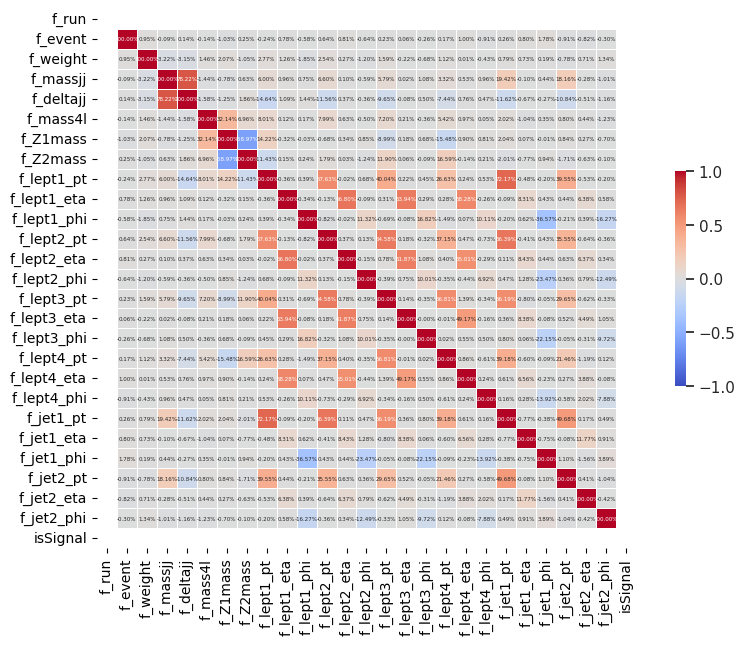

In [75]:
from matplotlib import pyplot as plt
# Show the linear correlation between each variable pairs in signal dataframe
f, ax = plt.subplots(figsize=(10, 7))
corr_sig = df['sig'].corr()
sns.set(font_scale=1.0)
corr_plot = sns.heatmap(corr_sig, linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]}, vmin=-1, vmax=1, fmt=".2%", annot=True, square=True,annot_kws = {"size":4})
figure = corr_plot.get_figure()
figure.savefig('corr_matrix_heatmap_sig.pdf')

#### <font color="#4196B4">**TASK:**</font> Look at the correlation matrix for background events and make a comparison with the signal one!

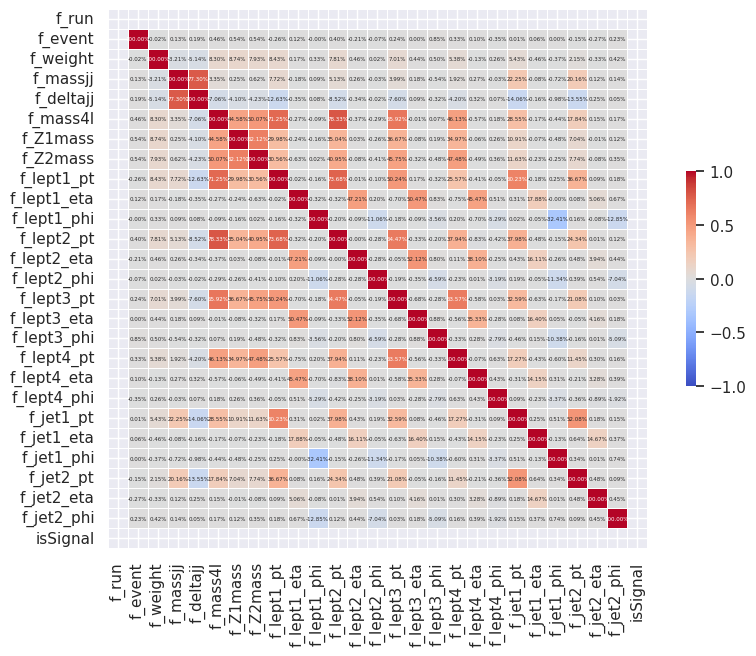

In [76]:
# Show the linear correlation between each variable pairs in bkg dataframe
f, ax = plt.subplots(figsize=(10, 7))
corr_bkg = df['bkg'].corr()
sns.set(font_scale=1.0)
corr_plot = sns.heatmap(corr_bkg, linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]}, vmin=-1, vmax=1, fmt=".2%", annot=True, square=True,annot_kws = {"size":4})
figure = corr_plot.get_figure()
figure.savefig('corr_matrix_heatmap_bkg.pdf')

In [449]:
# Filter dataframe leaving just the Neural Network input variables

#NN_VARS= ['f_lept1_pt','f_lept2_pt','f_lept3_pt','f_lept4_pt','f_massjj', 'f_deltajj',  'f_Z2mass',]
NN_VARS = [ 'f_lept1_pt','f_lept1_eta','f_lept1_phi','f_lept2_pt','f_lept2_eta','f_lept2_phi','f_lept3_pt','f_lept3_eta','f_lept3_phi', 'f_lept4_pt','f_lept4_eta','f_lept4_phi','f_Z2mass']

df_input  = df_all.filter(NN_VARS)
df_target = df_all.filter(['isSignal']) # flag
df_weights = df_all.filter(['f_weight'])
# the weights are also important to be given as input to the training

# Transform dataframes to numpy arrays of float32
# (X->NN input , Y->NN target output , W-> event weights)

NINPUT=len(NN_VARS)
print("Number NN input variables=",NINPUT)
print("NN input variables=",NN_VARS)
X  = np.asarray( df_input.values ).astype(np.float32)
Y  = np.asarray( df_target.values ).astype(np.float32)
W  = np.asarray( df_weights.values ).astype(np.float32)
print(X.shape)
print(Y.shape)
print(W.shape)
print('\n')


Number NN input variables= 13
NN input variables= ['f_lept1_pt', 'f_lept1_eta', 'f_lept1_phi', 'f_lept2_pt', 'f_lept2_eta', 'f_lept2_phi', 'f_lept3_pt', 'f_lept3_eta', 'f_lept3_phi', 'f_lept4_pt', 'f_lept4_eta', 'f_lept4_phi', 'f_Z2mass']
(100724, 13)
(100724, 1)
(100724, 1)




# <font color="#002A48">Splitting the data into testing and training data-set</font>

You can split now the data-sets into two parts (one for the training and validation steps and one for testing phase).



#### <font color="#4196B4">**TASK**:</font> are you able to do that by using the [scikit-learn](https://scikit-learn.org) library?

In [340]:
# ******************************************************************
# * EDIT: Classical way to proceed, using a scikit-learn algorithm:*
# ******************************************************************



In [450]:
# Alternative way, the one that we chose in order to study the model's performance
# with ease (with an analogous procedure used by TMVA in the ROOT framework)
# to keep information about the flag isSignal in both training and test steps.

size= int(len(X[:,0]))
test_size = int(0.2*len(X[:,0]))
print('X (features) before splitting')
print('\n')
print(X.shape)
print('X (features) splitting between test and training')
X_test= X[0:test_size+1,:]

print('Test:')
print(X_test.shape)
X_train_val= X[test_size+1:len(X[:,0]),:]
print('Training:')
print(X_train_val.shape)
print('\n')

print('Y (target) before splitting')
print('\n')
print(Y.shape)
print('Y (target) splitting between test and training ')
Y_test= Y[0:test_size+1,:]
print('Test:')
print(Y_test.shape)
Y_train_val= Y[test_size+1:len(Y[:,0]),:]
print('Training:')
print(Y_train_val.shape)
print('\n')

print('W (weights) before splitting')
print('\n')
print(W.shape)
print('W (weights) splitting between test and training ')
W_test= W[0:test_size+1,:]
print('Test:')
print(W_test.shape)
W_train_val= W[test_size+1:len(W[:,0]),:]
print('Training:')
print(W_train_val.shape)
print('\n')


X (features) before splitting


(100724, 13)
X (features) splitting between test and training
Test:
(20145, 13)
Training:
(80579, 13)


Y (target) before splitting


(100724, 1)
Y (target) splitting between test and training 
Test:
(20145, 1)
Training:
(80579, 1)


W (weights) before splitting


(100724, 1)
W (weights) splitting between test and training 
Test:
(20145, 1)
Training:
(80579, 1)




#### <font color="#4196B4">**TASK**:</font> have a look to the parameter setting *test_size*. Why did we choose that fraction of events to be used for the testing phase?


# <font color="#002A48">Description of the Artificial Neural Network (ANN) model and KERAS API </font>
In this section you will find the following subsections:
* **Introduction to the Neural Network algorithm**<br>
If you have the knowledge about ANN you may skip it.
* **Usage of Keras API: basic concepts**<br>
Here you find concepts that are useful for the ANN implementation using KERAS API (callfunctions, metrics etc.).


There are three ways to create Keras models:

* **The Sequential model**, which is very straightforward (a simple list of
layers), but is limited to single-input, single-output stacks of layers (as the name gives away).
* **The Functional API**, which is an easy-to-use, fully-featured API that supports arbitrary model architectures. For most people and most use cases, this is what you should be using. This is the Keras "industry strength" model. We will use it.
* **Model subclassing**,where you implement everything from scratch on your own. You have to use this one, if you have complex, out-of-the-box research use cases.


## <font color="#002A48">Introduction to the Neural Network algorithm : basic THEORY concepts</font>



A Neural Network (NN) is a biology-inspired analytical model, but not a bio-mimetic one. It is formed by a network of basic elements called *neurons* or *perceptrons* (see the picture below), which receive input, change their state according to the input and produce an output.


### <font color="#002A48">The neuron/perceptron concept</font>
<img src="
https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2013.19.41.png" style="display: block; margin: auto;" width="300" height="200" align="right" /><br>
The perceptron, while it has a simple structure, has
the ability to learn and solve very complex
problems.
* It takes the inputs which feed into the
perceptrons, multiplies them by their
weights, and computes the sum. In the first iteration the weights are set randomly.
* It adds the number one, multiplied by a “bias
weight”.
* It feeds the sum through the activation
function in a simple perceptron system, the
activation function is a step function.
* The result of the step function is the neuron output.

### <font color="#002A48">Neural Network Topologies</font>

A Neural Networks (NN) can be classified according to the type of
neuron interconnections and the flow of information.
<br>
#### <font color="#002A48">Feed Forward Networks</font>
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2015.22.25.png" style="display: block; margin: auto;" width="150" align="right"/><br>
A feedforward NN is a neural network where connections
between the nodes do not form a cycle. In a feed-forward
network information always moves one direction, from input to
output, and it never goes backward. Feedforward NN can be
viewed as mathematical models of a function $f: R^{N} \to R^{M}$.
<br>
#### <font color="#002A48">Recurrent Neural Network</font>
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2015.23.19.png" style="display: block; margin: auto;" width="150" align="left"/><br>
A Recurrent Neural Network (RNN) is the one that allows connections between nodes in the same layer, among each other or with previous layers.

Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequential input data.
<br>

### <font color="#002A48">Dense Layer</font>

A Neural Network layer is called a dense layer to indicate that it’s fully
connected.

Information about the Neural Network architectures can be found here: [https://www.asimovinstitute.org/neural-network-zoo/](https://www.asimovinstitute.org/neural-network-zoo/)

### <font color="#002A48">Artificial Neural Network</font>

The discriminant output is computed by combining the response of multiple nodes, each representing a single neuron cell. Nodes are arranged into layers.

In an ANN the input variable values $ x_{1} ; x_{2} ;…; x_{p}$ are passed to a first input layer, whose output is passed as input to the next layer, and so on.


The last output layer usually consists of a single node that provides the discriminant output. Intermediate layers between the input and the output
layers are called hidden layers. Usually, if a Neural Network has more than one hidden layer is called **Deep Neural Network** and theoretically it is able to do the feature extraction by itself (it becomes a Deep Learning algorithm).

Such a structure is also called **Feedforward Multilayer Perceptron** (MLP, see the picture).

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2014.27.57.png" style="display: block; margin: auto;" width="400" align="left"/><br>

The output of the $k_{th}$ node of the $nth$ layers is
computed as the weighted average of the input variables,
with weights that are subject to optimization via
training.

The activation layer filters out the output , using an
activation function. It converts the output of a given
layer before passing on the information to
consecutive layers. It can be a sigmoid, arctangent,
step function (new functions as ReLu,SeLu) because
they mimic a learning curve.

Then a bias or threshold parameter $w_{0}$ is applied.
This bias accounts for the random noise, in the sense
that it measures how well the model fits the training
set (i.e. how much the model is able to correctly predict
the known outputs of the training examples.)
The output of a given node is: $y^{(n)}_{k}(\vec{x})=\phi (w^{n}_{0}\sum_{j=1}^{p^{(n)}}w^{(n)}_{kj}x_{j})$.

### <font color="#002A48">Supervised Learning: the loss function</font>
In order to train the neural network, a further function is introduced in the model, the **loss (cost) function** that quantifies the error between the NN output $y(\vec{x})$and the desired target output.The choice of the loss function is directly related to the activation function used in
the output layer !

If we have binary targets $t \in\{0,1\}$ we use the **Cross Entropy Loss**: $L = -tlog[y(\vec{x})] - (1-t)log(1-y(\vec{x}))$.

During training we optimize the loss function, i.e. reduce
the error between actual and predicted values.
Since we deal with a binary classification problem, the
$y_{true}$ can take on just two values, $y_{true} =0$ (for hypothesis
$H_{0}$) and $y_{true} = 1$ (for hypothesis $H_{1}$).

A popular algorithm to optimize the weights consists of iteratively modifying the weights after each training observation or after a bunch of training observations by doing a minimization of the loss function.

The minimization usually proceeds via the so-called **Stochastic Gradient Descent** (SGD) which modifies weight at each iteration according to the following formula: $w^{(n)}_{ij} \to w^{(n)}_{ij} - \eta \frac{\partial L(w)}{\partial w^{(n)}_{ij}}$ .

Other more complex optimization algorithms are available in KERAS API.

More info: [https://keras.io/api/optimizers/](https://keras.io/api/optimizers/).

### <font color="#002A48">Metrics</font>
A metric is a function that is used to judge the performance of your model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used during the training of the model. Note that you may use any loss function as a metric.

### <font color="#002A48">Other parameters of a Neural Network</font>

Hyperparameters are the variables that determine the network structure
and how the network is trained.
Hyperparameters are set before training. A list of the main parameters is below:
* `Number of Hidden Layers and units`: the hidden layers are the layers between the input layer and the output layer. Many hidden units within a layer can increase accuracy. A smaller number of units may cause underfitting.
* `Network Weight Initialization`: ideally, it may be better to use different weight initialization schemes according to the activation
function used on each layer. Mostly uniform distribution is used.
* `Activation functions`: they are used to introduce nonlinearity to models, which allows deep learning models to learn nonlinear prediction boundaries.
* `Learning Rate`: it defines how quickly a network updates its parameters. A low learning rate slows down the learning process but converges smoothly. A larger learning rate speeds up the learning but may not converge. Usually a decaying Learning rate is preferred.
* `Number of epochs`: in terms of artificial neural networks, an epoch refers to one cycle through the full training data-set. Usually, training a neural network takes more than a few epochs. An epoch is often mixed up with an iteration. Iterations is the number of batches or steps through partitioned packets of the training data, needed to complete one epoch. You must increase the number of epochs until the validation accuracy starts decreasing even when the training accuracy is increasing in order to avoid overfitting.
* `Batch size`: a number of subsamples (events) given to the network after the update of the parameters. A good default for batch size might be 32. Also try 32, 64, 128, 256, and so on.
* `Dropout`: regularization technique to avoid overfitting thus increasing the generalizing power. Generally, use a small dropout value of 10%-50% of neurons.Considering a too low value has minimal effect, while a too high one could result in a network under-learning.


### <font color="#002A48">Applications in High Energy Physics</font>
Nowadays ANNs are used on a variety of tasks: image and speech recognition, translation,filtering, game playing, medical diagnosis, autonomous vehicles.
There are also many applications in High Energy Physics: classification of signal and background events, particle tagging, simulation of event reconstruction...


## <font color="#002A48">Usage of Keras API: basic THEORY concepts</font>

### <font color="#002A48">Keras layers API</font>
Layers are the basic building blocks of neural networks in Keras. A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights).

### <font color="#002A48">Callbacks API</font>

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2015.46.18.png" style="display: block; margin: auto;" width="400" align="right"/><br>

A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).

You can use callbacks in order to:

* Write TensorBoard logs after every batch of training to monitor your metrics
* Periodically save your model to disk
* Do early stopping
* Get a view on internal states and statistics of a model during training

More info and examples about the most used that we will use: [ModelCheckPoint](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint), [EarlyStopping](https://keras.io/api/callbacks/early_stopping/), [LearningRateScheduler](https://keras.io/api/callbacks/learning_rate_scheduler/), [ReduceLROnPlateau](https://keras.io/api/callbacks/reduce_lr_on_plateau/).


### <font color="#002A48">Regularization layers : the dropout layer</font>

<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2015.46.29.png" style="display: block; margin: auto;" width="400" align="right"/><br>



The Dropout layer randomly sets input units to 0 with a frequency of `rate` at each step during training time, which helps prevent **overtraining**. Inputs not set to 0 are scaled up by `1/(1-rate)` such that the sum over all inputs is unchanged.

Note that the Dropout layer only applies when training is set to `True` such that no values are dropped during inference. When using `model.fit`, training will be appropriately set to `True` automatically, and in other contexts, you can set the flag explicitly to `True` when calling the layer.



# <font color="#002A48">Artificial Neural Network implementation</font>

We can now start to define the first architecture. The most simple approach is using fully connected layers (**`Dense`** layers in Keras/Tensorflow), with **`selu`** activation function and a **`sigmoid`** final layer, since we are affording a binary classification problem.

We are using the `binary_crossentropy` loss function during training, a standard loss function for binary classification problems.
We will optimize the model with the RMSprop algorithm and we will collect `accuracy` metrics while the model is trained.

In order to avoid overfitting we use also Dropout layers and some callback functions.

In [452]:
# Define Neural Network with 3 hidden layers ( #h1=10*N≠INPUT , #h2=2*NINPUT , #h3=NINPUT ) & Dropout layers



input_layer  = Input(shape=(NINPUT,), name = 'input')
hidden = Dense(NINPUT+10, name = 'hidden1', kernel_initializer='normal', activation='sigmoid')(input_layer)
hidden = Dropout(rate=0.1)(hidden)
#hidden = Dense(NINPUT*2 , name = 'hidden2', kernel_initializer='normal', activation='selu')(hidden)
#hidden = Dropout(rate=0.1)(hidden)
#hidden = Dense(NINPUT, name = 'hidden3', kernel_initializer='normal', activation='selu')(hidden)
#hidden = Dropout(rate=0.1)(hidden)
output  = Dense(1 , name = 'output', kernel_initializer='normal', activation='sigmoid')(hidden)


# Create the model
model = Model(inputs=input_layer, outputs=output)
# Define the optimizer ( minimization algorithm )

#optim = SGD(learning_rate=0.01,decay=1e-6)
#optim = Adam(learning_rate=0.0001)
#optim = Adagrad(learning_rate=0.0001 )
#optim = Adadelta(learning_rate=0.0001 )
optim = RMSprop(learning_rate = 0.01) #default lr= 1e-3

# Compile the model

#model.compile(optimizer=optim, loss='mean_squared_error', metrics=['accuracy'], weighted_metrics=['accuracy'])
model.compile( optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'], weighted_metrics=['accuracy'])
# NOTE: the accuracy (defined as the number of good matches between the predictions and the class labels)

#### <font color="#4196B4">**TASK**:</font> print the summary of the model's properties! Are you able to tell us which is the expression to retrieve the number of parameter per each DNN layer?


In [417]:
# ****************************************************************
# * EDIT: print the model summary by using a standard keras tool *
# * which creates a table with layers and parameters.            *
# ****************************************************************


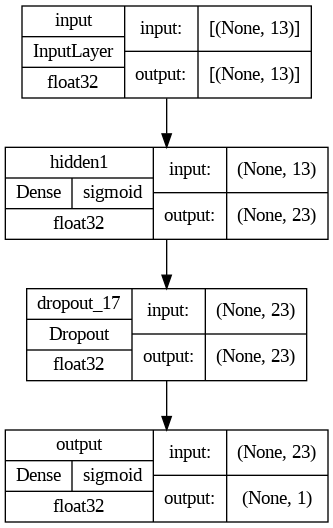

In [453]:
# Alternative way of plotting the model properties via graphical visualization
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, show_dtype=True,show_layer_activations=True)

In [455]:
## Call functions implementation to monitor the chosen metrics

#Stop training when a monitored metric has stopped improving
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                           mode='min',# quantity that has to be monitored(to be minimized in this case)
                              patience = 50, # Number of epochs with no improvement after which training will be stopped.
                              min_delta = 1e-7,
                              restore_best_weights = True) # update the model with the best-seen weights

#Reduce learning rate when a metric has stopped improving
reduce_LR = keras.callbacks.ReduceLROnPlateau( monitor = 'val_loss',
                                              mode='min',# quantity that has to be monitored
                                              min_delta=1e-7,
                                              factor = 0.1, # factor by which LR has to be reduced...
                                              patience = 10, #...after waiting this number of epochs with no improvements
                                              #on monitored quantity
                                              min_lr= 0.00001 )


callback_list = [reduce_LR, early_stop]

You need to define the hyper-parameters of your ANN for the algorithm's training phase. Please test more!



In [457]:
# Number of training epochs
nepochs=200
# Batch size
batch=200
# Train classifier (2 minutes more or less)
history = model.fit(X_train_val[:,0:NINPUT],
                    Y_train_val,
                    epochs=nepochs,
                    sample_weight=W_train_val,
                    batch_size=batch,
                    callbacks = callback_list,
                    verbose=1, # switch to 1 for more verbosity
                    validation_split=0.3 ) # fix the validation data-set size

# You can save the best ANN model in:
model_file = 'ANN_model.h5'
model.save(model_file)

Epoch 1/200
283/283 [==============================] - 1s 3ms/step - loss: 1.2396e-05 - accuracy: 0.6642 - weighted_accuracy: 0.7016 - val_loss: 1.2365e-05 - val_accuracy: 0.6643 - val_weighted_accuracy: 0.7030 - lr: 0.0100
Epoch 2/200
283/283 [==============================] - 1s 3ms/step - loss: 1.2335e-05 - accuracy: 0.6676 - weighted_accuracy: 0.7021 - val_loss: 1.2303e-05 - val_accuracy: 0.6606 - val_weighted_accuracy: 0.7040 - lr: 0.0100
Epoch 3/200
283/283 [==============================] - 1s 3ms/step - loss: 1.2274e-05 - accuracy: 0.6652 - weighted_accuracy: 0.7016 - val_loss: 1.2244e-05 - val_accuracy: 0.6632 - val_weighted_accuracy: 0.7054 - lr: 0.0100
Epoch 4/200
283/283 [==============================] - 1s 3ms/step - loss: 1.2211e-05 - accuracy: 0.6674 - weighted_accuracy: 0.7011 - val_loss: 1.2187e-05 - val_accuracy: 0.6608 - val_weighted_accuracy: 0.7050 - lr: 0.0100
Epoch 5/200
283/283 [==============================] - 1s 3ms/step - loss: 1.2160e-05 - accuracy: 0.6685

# <font color="#002A48">Performance evaluation: THEORY concepts</font>

In this section you will find the following subsections:
* **ROC curve and Rates definitions**<br>
* **Overfitting and test evaluation of an MVA model**<br>
If you have the knowledge about these theoretical concepts you may skip it.
* **Artificial Neural Network performance**

## <font color="#002A48"> ROC curve and rates definitions</font>

There are many ways to evaluate the quality of the prediction of a model. In the ANN implementation, we evaluated the accuracy metric and the loss of the training and validation samples.

Another largely used evaluation metric for binary classification tasks is the *Receiver Operating Characteristic* curve or **ROC curve**.

First, we introduce the terms `positive` and `negative` referring to the classifier’s prediction, and the terms `true` and `false` referring to whether the network prediction corresponds to the observation (the "truth" level). In our Higgs boson binary classification exercise, we can think the `negative` outcome as the one labeling background (that, in the last sigmoid layer of our network, would mean a number close to 0), and the `positive` outcome as the one labeling signal (that, in the last sigmoid layer of our network, would mean a number close to 1 ).

* **TP (true positive)**: the event is signal, the prediction is signal (*correct result*)
* **FP (false positive)**: the event is background, but the prediction is signal (*unexpected result*)
* **TN (true negative)**: the event is background, the prediction is background (*correct absence of signal*)
* **FN (false negative)**: the event is signal, the prediction is background (*missing a true signal event*)

Some additional definitions:

* **TPR (true positive rate)**: how often the network predicts a positive outcome (*signal*), when the input is positive (*signal*):  $TPR = \frac{TP}{TP+FN}$
* **FPR (false positive rate)**: how often the network predicts a positive outcome (*signal*), when the input is negative (*background*) : $FPR = \frac{FP}{FP+TN}$

A good classifier should give a high TPR and a small FPR.

Quoting wikipedia:

"A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, probability of detection, or signal efficiency in high energy physics. The false-positive rate is also known as the probability of false alarm or fake rate in high energy physics."

The ROC curve requires the true binary value (0 or 1, background or signal) and the probability estimates of the positive (signal) class.

The **`roc_auc_score`** function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC. By computing the area under the roc curve, the curve information is summarized in one number.

For more information see: [https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve).


The AUC is the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one. The higher the AUC, the better the performance of the classifier. If the AUC is 0.5, the classifier is uninformative, i.e., it will rank equally a positive or a negative observation.

## <font color="#002A48">Other metrics</font>


The **precision/purity** is the ratio $\frac{TP}{TP + FP} $where TP is the number of true positives and FP the number of false positives.
The precision is intuitively the ability of the classifier not to label as positive a sample
that is negative.


The **recall/sensitivity/TPR/signal efficiency** is the ratio $\frac{TP}{TP + FN}$ where TP is the number of
true positives and FN the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.


**Accuracy** is defined as the number of good matches between the predictions and the true labels:

$\text{Accuracy} =\frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$.

<p>For binary classification, accuracy can also be calculated in terms of positives and negatives as follows:</p>

<div class="left-align">
$$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$$
</div>


You can always achieve high accuracy on skewed/unbalanced data-sets by predicting the most the same output (the most common one) for every input. Thus the another metric, **F1** can be used when there are more positive examples than negative examples. It is defined in terms of the precision and recall as **(2 * precision * recall) / (precision + recall)**. In our case, we will use a simplification of this metric that is the product **signal*efficiency**.

In [458]:
#Let's import all the metrics that we need later on!
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score , precision_score , recall_score , precision_recall_curve , roc_curve, auc , roc_auc_score


### <font color="#002A48">Overfitting and test evaluation of an MVA model</font>
<img src="https://raw.githubusercontent.com/bdanzi/Higgs_exercise/main/Schermata%202021-04-10%20alle%2015.51.23.png" style="display: block; margin: auto;" width="400" align="right"/><br><br><br>
The loss function and the accuracy metrics give us a measure of the **overtraining (overfitting)** of the ML algorithm. Over-fitting happens when an ML algorithm learns to recognize a pattern that is primarily based on the training (validation) sample and that is nonexistent when looking at the testing (training) set (see the plot on the right side to understand what we would expect when overfitting happens).


## <font color="#002A48">Artificial Neural Network performance</font>



Let's see how our ANN model training went by making some plots! In order to do so, look into the [history](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/) object. Plot them as a function of the epoch.

Autosave disabled


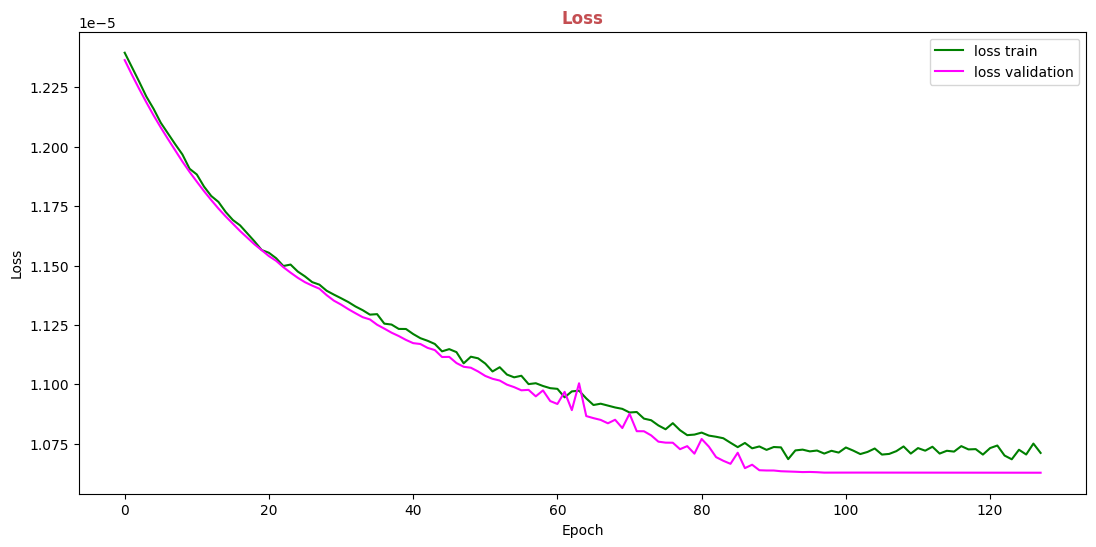

In [459]:
from matplotlib import pyplot as plt

# plot the loss fuction vs epoch during the training phase
# the plot of the loss function on the validation set is also computed and plotted
%autosave 0
plt.rcParams['figure.figsize'] = (13,6)
plt.plot(history.history['loss'], label='loss train',color='green')
plt.plot(history.history['val_loss'], label='loss validation',color='magenta')
plt.title("Loss", fontsize=12,fontweight='bold', color='r')
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### <font color="#4196B4">**TASK**:</font> Why does the validation loss decrease more than the training loss?


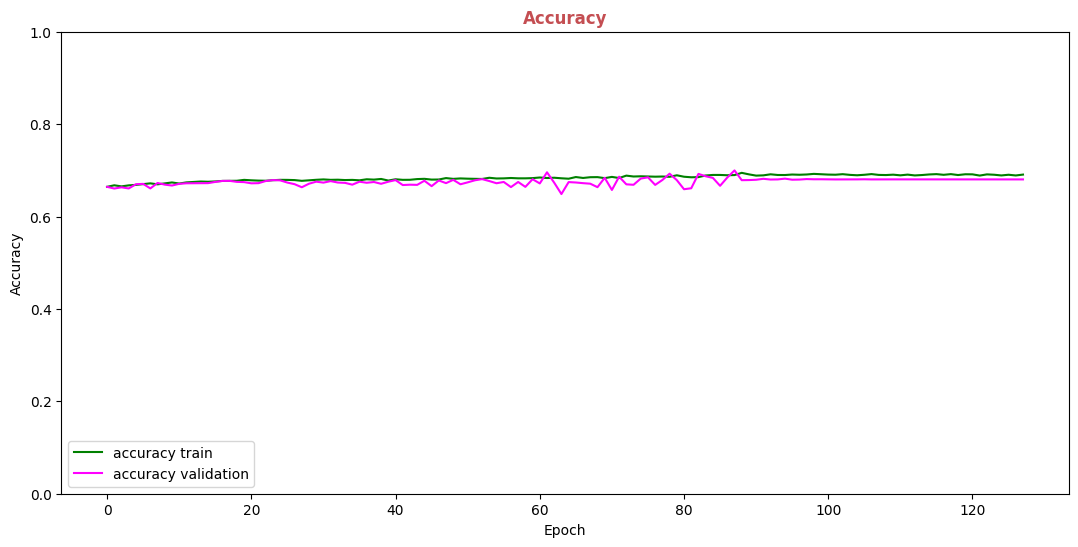

In [460]:
# Plot accuracy metrics vs epoch during the training
# for the proper training data-set and the validation one
plt.rcParams['figure.figsize'] = (13,6)
plt.plot(history.history['accuracy'], label='accuracy train',color='green')
plt.plot(history.history['val_accuracy'], label='accuracy validation',color='magenta')
plt.title("Accuracy",fontsize=12,fontweight='bold', color='r')
plt.ylim([0, 1.0])
plt.legend(loc="lower left")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Now let's use our **test data-set** in order to see which are the performance of our model on a never-seen-before data-set and make comparison with what we obtained with the **training data-set**!


In [461]:
# Get ANN model label predictions and performance metrics curves, after having trained the model
y_true = Y_test[:,0]
y_true_train = Y_train_val[:,0]
w_test = W_test[:,0]
w_train = W_train_val[:,0]
Y_prediction = model.predict(X_test[:,0:NINPUT])

# Get precision, recall,
p, r, t = precision_recall_curve( y_true= Y_test, probas_pred= Y_prediction ,
                                 sample_weight=w_test )
# Get False Positive Rate (FPR) True Positive Rate (TPR) , Thresholds/Cut on the ANN's score
fpr, tpr, thresholds = roc_curve( y_true= Y_test,  y_score= Y_prediction, sample_weight=w_test )


Y_prediction_train = model.predict(X_train_val[:,0:NINPUT])
p_train, r_train, t_train = precision_recall_curve( Y_train_val, Y_prediction_train ,
                                                   sample_weight=w_train )
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train_val, Y_prediction_train,
                                                   sample_weight=w_train)



2519/2519 [==============================] - 3s 1ms/step


#### <font color="#4196B4">**TASK**:</font> plot the ANN ROC curve on the test and training data-sets to check the ANN performance!

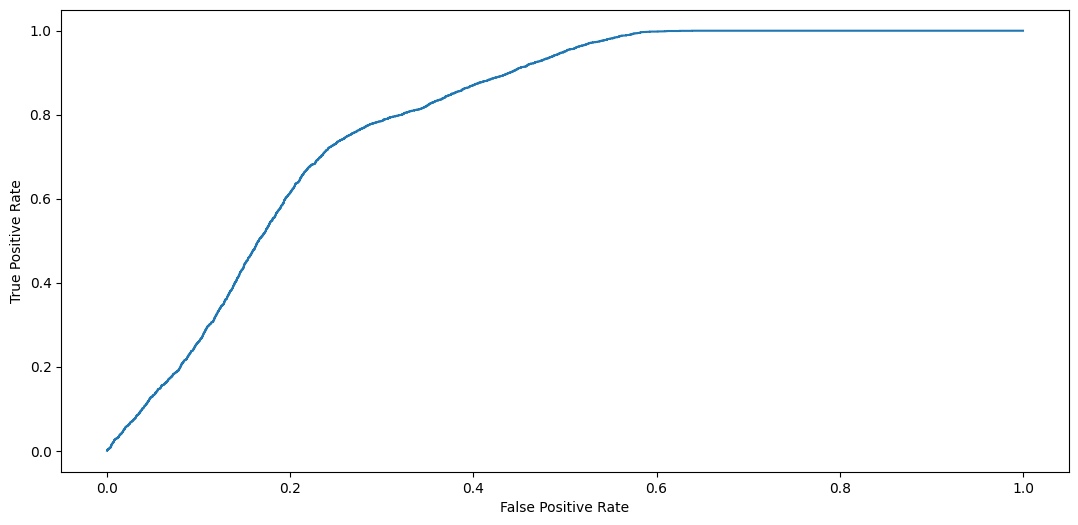

In [462]:
from sklearn.metrics import RocCurveDisplay, roc_curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

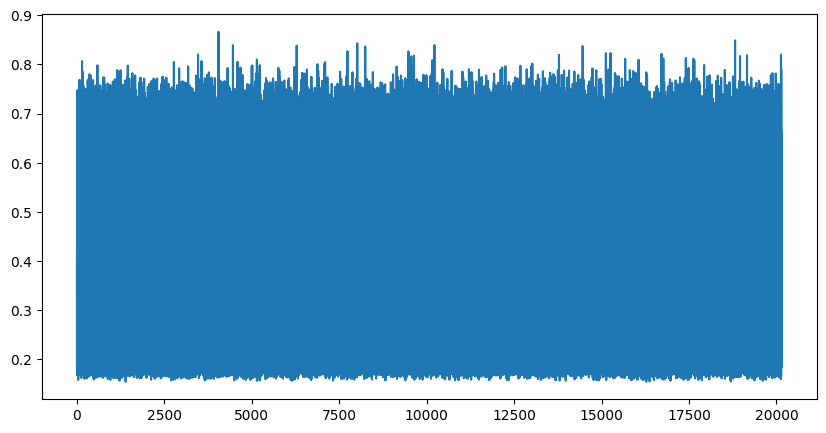

In [463]:
# Plot of the NN outputs -- ANN
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(Y_prediction,label='signal distribution')




(array([3.554e+03, 2.643e+03, 7.810e+02, 6.110e+02, 5.000e+02, 3.640e+02,
        3.210e+02, 3.040e+02, 3.170e+02, 3.130e+02, 3.360e+02, 3.410e+02,
        3.330e+02, 3.710e+02, 4.650e+02, 6.960e+02, 6.500e+02, 5.600e+02,
        5.720e+02, 6.070e+02, 7.070e+02, 9.230e+02, 1.164e+03, 1.172e+03,
        9.420e+02, 4.130e+02, 1.350e+02, 3.300e+01, 1.400e+01, 3.000e+00]),
 array([0.15466949, 0.17838842, 0.20210733, 0.22582625, 0.24954516,
        0.27326408, 0.296983  , 0.3207019 , 0.34442082, 0.36813974,
        0.39185867, 0.41557756, 0.43929648, 0.46301541, 0.48673433,
        0.51045322, 0.53417218, 0.55789107, 0.58160996, 0.60532892,
        0.62904781, 0.65276676, 0.67648566, 0.70020455, 0.7239235 ,
        0.7476424 , 0.77136129, 0.79508024, 0.81879914, 0.84251809,
        0.86623698]),
 <BarContainer object of 30 artists>)

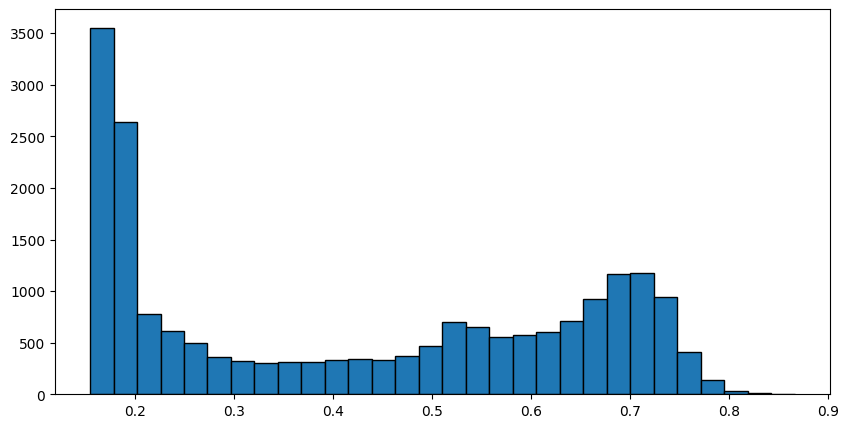

In [464]:
# *********************************************************************
# EDIT: Plotting the ANN ROC curve on the test and training data-sets *
# *********************************************************************

# Create an array representing the sample indices (0, 1, 2, ..., len(Y_prediction)-1)
plt.hist(Y_prediction, bins=30, edgecolor='black')

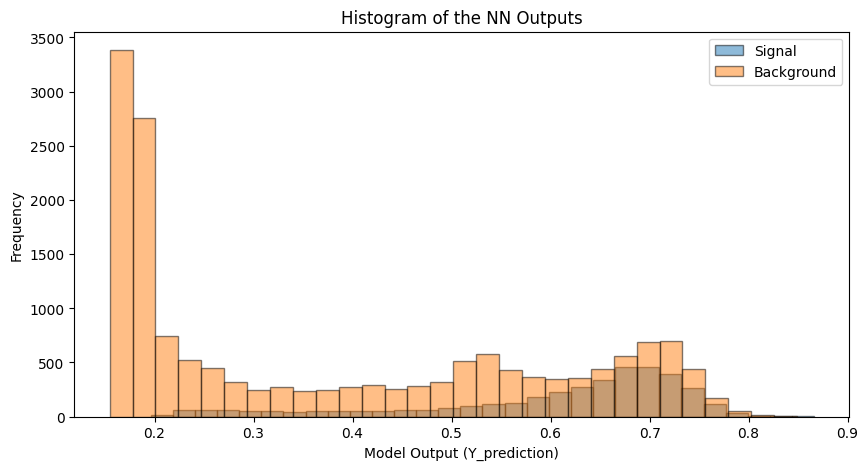

In [465]:
# *********************************************************************
# EDIT: Plotting the ANN ROC curve on the test and training data-sets *
# *********************************************************************


import matplotlib.pyplot as plt

# Assuming Y_prediction is a 1D array representing the model's output probabilities

# Get the indices of signal events in Y_test and Y_prediction
signal_indices = (Y_test[:, 0] == 1)
background_indices = ~signal_indices

# Get the model's output for signal and background events
signal_output = Y_prediction[signal_indices]
background_output = Y_prediction[background_indices]

# Create the histograms for signal and background events
plt.hist(signal_output, bins=30, alpha=0.5, label='Signal', edgecolor='black')
plt.hist(background_output, bins=30, alpha=0.5, label='Background', edgecolor='black')

plt.xlabel('Model Output (Y_prediction)')
plt.ylabel('Frequency')
plt.title('Histogram of the NN Outputs')
plt.legend()
plt.show()




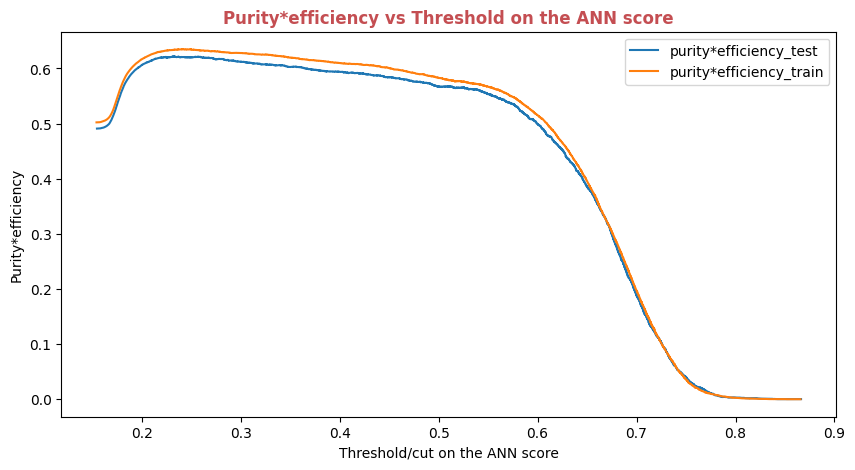

In [466]:
# Plot of the metrics Efficiency x Purity -- ANN
# Looking at this curve we will choose a threshold on the ANN score
# for distinguishing between signal and background events
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(t,p[:-1]*r[:-1],label='purity*efficiency_test')
plt.plot(t_train,p_train[:-1]*r_train[:-1],label='purity*efficiency_train')
plt.xlabel('Threshold/cut on the ANN score')
plt.ylabel('Purity*efficiency')
plt.title('Purity*efficiency vs Threshold on the ANN score',fontsize=12,fontweight='bold', color='r')
#plt.tick_params(width=2, grid_alpha=0.5)
plt.legend(markerscale=50)
plt.show()

In [191]:
# Plot of the NN outputs -- ANN
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(Y_score,label='signal distribution')

NameError: ignored

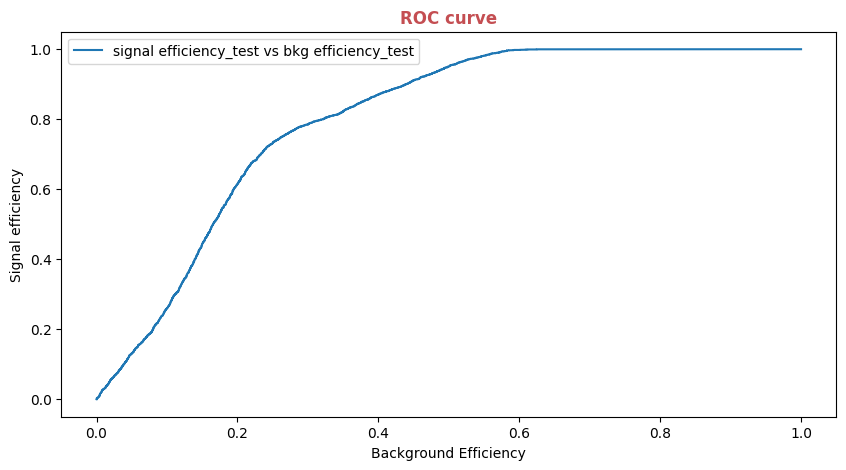

In [467]:
# Plot of the metrics Efficiency x Purity -- ANN
# Looking at this curve we will choose a threshold on the ANN score
# for distinguishing between signal and background events
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(fpr,tpr,label='signal efficiency_test vs bkg efficiency_test')
# I am not sure if the x and y values are specified coorrectly in the line above or the tpr and fpr calculations are swapped.
#plt.plot(t_train,p_train[:-1]*r_train[:-1],label='purity*efficiency_train')
plt.xlabel('Background Efficiency')
plt.ylabel('Signal efficiency')
plt.title('ROC curve',fontsize=12,fontweight='bold', color='r')
#plt.tick_params(width=2, grid_alpha=0.5)
plt.legend(markerscale=50)
plt.show()

In [468]:

# Print metrics imposing a threshold for the test sample. In this way the student
# can use later the model's score to discriminate signal and bkg events for a fixing
# score

cut_dnn=0.6

# Transform predictions into a array of entries 0,1 depending if prediction is beyond the
# chosen threshold
y_pred = Y_prediction[:,0]
y_pred[y_pred >= cut_dnn]= 1 #classify them as signal
y_pred[y_pred < cut_dnn]= 0 #classify them as background
y_pred_train = Y_prediction_train[:,0]
y_pred_train[y_pred_train>=cut_dnn]=1
y_pred_train[y_pred_train<cut_dnn]=0

print("y_true.shape",y_true.shape)
print("y_pred.shape",y_pred.shape)
print("w_test.shape",w_test.shape)
print("Y_prediction",Y_prediction)
print("y_pred",y_pred)


y_true.shape (20145,)
y_pred.shape (20145,)
w_test.shape (20145,)
Y_prediction [[0.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]]
y_pred [0. 0. 1. ... 1. 0. 0.]


In [469]:
# Other Metrics values for the ANN algorithm having fixed an ANN score threshold
accuracy  = accuracy_score(y_true, y_pred, sample_weight=w_test)
precision = precision_score(y_true, y_pred, sample_weight=w_test)
recall    = recall_score(y_true, y_pred, sample_weight=w_test)
f1 = 2*precision*recall/(precision+recall)
cm = confusion_matrix( y_true, y_pred, sample_weight=w_test)
print('Cut/Threshold on the ANN output : %.4f' % cut_dnn)
print('ANN Test Accuracy: %.4f' % accuracy)
print('ANN Test Precision/Purity: %.4f' % precision)
print('ANN Test Sensitivity/Recall/TPR/Signal Efficiency: %.4f' % recall)
print('ANN Test F1: %.4f' %f1)
print('')


Cut/Threshold on the ANN output : 0.6000
ANN Test Accuracy: 0.7263
ANN Test Precision/Purity: 0.7475
ANN Test Sensitivity/Recall/TPR/Signal Efficiency: 0.6683
ANN Test F1: 0.7057



The information from the evaluation metrics can be summarised in a so-called **confusion matrix** whose elements, from the top-left side, represent TN, FP, FN and TP rates.

Cut/Threshold on the ANN output : 0.6000 

Confusion matrix ANN



Text(0.5, 1.0, 'Normalized Confusion Matrix for the Test data-set - Artificial Neural Network ')

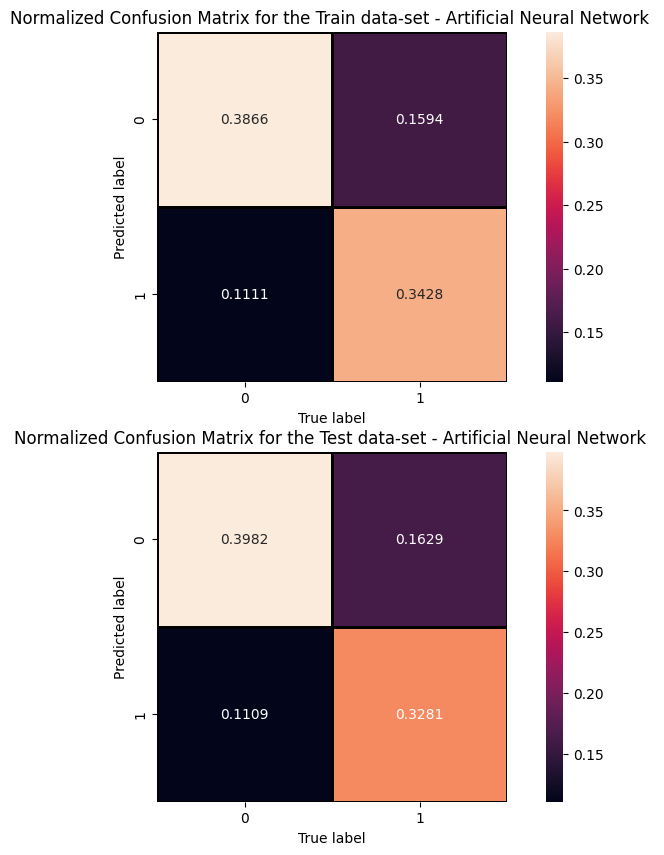

In [470]:
print('Cut/Threshold on the ANN output : %.4f \n' % cut_dnn )
print('Confusion matrix ANN\n')

plt.style.use('default') # It's ugly otherwise
plt.figure(figsize=(10,10) )


plt.subplot(2,1,1)
mat_train = confusion_matrix(y_true_train, y_pred_train,sample_weight=w_train,normalize='all')
sns.heatmap(mat_train.T, square=True, annot=True, fmt='.4f', cbar=True,linewidths=1,linecolor='black' )
plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Normalized Confusion Matrix for the Train data-set - Artificial Neural Network ')

plt.subplot(2, 1, 2)
mat_test = confusion_matrix(y_true, y_pred ,sample_weight=w_test,normalize='all' )
sns.heatmap(mat_test.T, square=True, annot=True, fmt='.4f', cbar=True,linewidths=1,linecolor='black')
plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Normalized Confusion Matrix for the Test data-set - Artificial Neural Network ')


An alternative way to check overfitting, and choosing correctly a threshold for selecting signal events, is plotting signal and background ANN predictions for the training and test data-sets. If the distributions are quite similar it means that the algorithm learned how to generalize! <br> For measuring quantitatively the overfitting one can perform a [**Kolmogorov-Smirnov**](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test) test that we will not implement here.

In [471]:
# Let's get signal and background events for both test and training data-set!

df_sig  = df['sig'].filter(NN_VARS)
df_bkg  = df['bkg'].filter(NN_VARS)

X_sig  = np.asarray( df_sig.values ).astype(np.float32)
X_bkg  = np.asarray( df_bkg.values ).astype(np.float32)

df_test = df_all.iloc[0:test_size+1]
df_train = df_all.iloc[test_size+1:size]

df_test_sig = df_test[(df_test['isSignal']>=1)].filter(NN_VARS)
df_test_bkg = df_test[(df_test['isSignal']<1)].filter(NN_VARS)

df_train_sig = df_train[(df_train['isSignal']>=1)].filter(NN_VARS)
df_train_bkg = df_train[(df_train['isSignal']<1)].filter(NN_VARS)

X_test_sig  = np.asarray( df_test_sig.values ).astype(np.float32)
X_test_bkg  = np.asarray( df_test_bkg.values ).astype(np.float32)
X_train_sig  = np.asarray( df_train_sig.values ).astype(np.float32)
X_train_bkg  = np.asarray( df_train_bkg.values ).astype(np.float32)

print('Test data-set shape:')
print(df_test.shape)
print('Test data-set signal shape:')
print(df_test_sig.shape)
print('Test data-set background shape:')
print(df_test_bkg.shape)
print('Training data-set shape' )
print(df_train.shape)
print('Training signal data-set shape' )
print(df_train_sig.shape)
print('Training background data-set shape' )
print(df_train_bkg.shape)

Y_test_sig = model.predict(X_test_sig) #flag predicted on all signal events
Y_test_bkg = model.predict(X_test_bkg) #flag predicted on all background events
Y_train_sig = model.predict(X_train_sig)
Y_train_bkg = model.predict(X_train_bkg)

Test data-set shape:
(20145, 28)
Test data-set signal shape:
(3846, 13)
Test data-set background shape:
(16299, 13)
Training data-set shape
(80579, 28)
Training signal data-set shape
(15870, 13)
Training background data-set shape
(64709, 13)
2023/2023 [==============================] - 3s 1ms/step


In [472]:
df_test.head()

,f_run,f_event,f_weight,f_massjj,f_deltajj,f_mass4l,f_Z1mass,f_Z2mass,f_lept1_pt,f_lept1_eta,...,f_lept4_eta,f_lept4_phi,f_jet1_pt,f_jet1_eta,f_jet1_phi,f_jet2_pt,f_jet2_eta,f_jet2_phi,isSignal,NNoutput
733701,1,88289304,0.000014,342.687622,3.188140,327.461761,93.559860,88.696320,183.655701,0.708895,...,0.146822,1.941889,128.378403,0.523707,3.013170,37.472610,-2.664433,-1.696016,0.0,0.103601
246139,1,69033293,0.000005,179.658310,2.406654,291.849701,92.022652,93.763161,103.630447,-0.312696,...,1.229743,2.652637,66.246834,-0.437610,1.699816,38.155079,1.969044,-2.230798,0.0,0.097290
32453,1,34819933,0.000012,99.507828,1.202852,90.467094,53.468044,23.220175,175.072174,-1.071711,...,-1.493154,-0.602928,170.869034,-0.634863,1.798399,31.312323,0.567990,1.752840,0.0,0.653709
496102,1,91427940,0.000007,503.248718,4.051412,245.776352,89.663071,87.020363,81.511978,-0.451781,...,-0.480486,-1.218765,114.367004,-0.110173,-0.708088,38.289391,-4.161585,-1.973127,0.0,0.146036
57607,1,1035468,0.000055,144.227478,2.685120,124.546165,66.473145,24.894829,31.453909,-0.039498,...,1.435868,1.722751,51.140541,0.284264,1.515035,30.264082,2.969383,2.175036,1.0,0.756507


In [442]:
df_all.head()

,f_run,f_event,f_weight,f_massjj,f_deltajj,f_mass4l,f_Z1mass,f_Z2mass,f_lept1_pt,f_lept1_eta,...,f_lept4_eta,f_lept4_phi,f_jet1_pt,f_jet1_eta,f_jet1_phi,f_jet2_pt,f_jet2_eta,f_jet2_phi,isSignal,NNoutput
733701,1,88289304,0.000014,342.687622,3.188140,327.461761,93.559860,88.696320,183.655701,0.708895,...,0.146822,1.941889,128.378403,0.523707,3.013170,37.472610,-2.664433,-1.696016,0.0,0.501682
246139,1,69033293,0.000005,179.658310,2.406654,291.849701,92.022652,93.763161,103.630447,-0.312696,...,1.229743,2.652637,66.246834,-0.437610,1.699816,38.155079,1.969044,-2.230798,0.0,0.117233
32453,1,34819933,0.000012,99.507828,1.202852,90.467094,53.468044,23.220175,175.072174,-1.071711,...,-1.493154,-0.602928,170.869034,-0.634863,1.798399,31.312323,0.567990,1.752840,0.0,0.674940
496102,1,91427940,0.000007,503.248718,4.051412,245.776352,89.663071,87.020363,81.511978,-0.451781,...,-0.480486,-1.218765,114.367004,-0.110173,-0.708088,38.289391,-4.161585,-1.973127,0.0,0.389630
57607,1,1035468,0.000055,144.227478,2.685120,124.546165,66.473145,24.894829,31.453909,-0.039498,...,1.435868,1.722751,51.140541,0.284264,1.515035,30.264082,2.969383,2.175036,1.0,0.675154


#### <font color="#4196B4">**TASK**:</font> Plot the normalized distribution of the ANN score for the whole data-set!

In [ ]:
# *************************************************************************
# * EDIT: Normalized Distribution of the ANN score for the whole data-set *
# *************************************************************************


# <font color="#002A48">Plot physics observables</font>

We can easily plot the quantities (e.g. $m_{jj}$, $\eta_{j}$, $m_{4l}$, $m_{Z_{1}}$,$m_{Z_{2}}$) for those events in the data-sets which have the ANN output scores greater than the chosen decision threshold in order to show that the ML discriminators did learn from physics observables!
<br>
The subsections of this notebook part are:
* **Artificial Neural Network rates fixing an ANN score threshold from data frame**
* **Plot some physical quantities after that the event selection is applied**





In [473]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Define a data frame for low level features
data = df_all.filter(NN_VARS)
X_all   = np.asarray( data.values ).astype(np.float32)
#Use it for evaluating the NN output score for the entire data-set
Y_all = model.predict(X_all)

3148/3148 [==============================] - 4s 1ms/step


## <font color="#002A48">Artificial Neural Network rates fixing an ANN score threshold from data frame</font>

Let's fix a cut (looking at the performance of our models in terms of the previous **purity*efficiency** metrics plot) on our test statistic (ANN score) to select mostly VBF Higgs production signal events!

In [474]:
# Add the ANN prediction array 'NNoutput'column to the complete dataframe in order
# keep the information about the ML algorithm prediction for every event in the whole data-set
df_all['NNoutput'] = Y_all
# Selects events with NNoutput > cut
cut_dnn = 0.6
df_sel   = df_all[(df_all['NNoutput'] >= cut_dnn)]
df_TP    = df_all[(df_all['NNoutput'] >= cut_dnn) & (df_all['isSignal'] == 1)]
df_unsel = df_all[(df_all['NNoutput'] < cut_dnn)]
df_TN    = df_all[(df_all['NNoutput'] < cut_dnn) & (df_all['isSignal'] == 0)]

TP = len(df_TP)
FP = len(df_sel) - TP
TN = len(df_TN)
FN = len(df_unsel) - TN

truepositiverate = float(TP)/(TP+FN)
fakepositiverate = float(FP)/(FP+FN)
print('ANN score cut chosen:%.4f' % cut_dnn)
print("TP rate = %.4f"%truepositiverate)
print("FP rate = %.4f"%fakepositiverate)



ANN score cut chosen:0.6000
TP rate = 0.6758
FP rate = 0.7443


## <font color="#002A48">Plot some physical quantities after that the event selection is applied</font>

Note that we have not used the *low level features* in the training phase of our models,they behaved as **spectator variables**. We will plot the distribution of events considering their **actual label** (in the legend **signal** and **background**) and the distributions for the two classes that our classifiers have built after having fixed a threshold on their output scores.

#### <font color="#4196B4">**TASK:**</font> look at the observable plots and comment on them. Make an **importance list** of the high-level features used by the NN algorithm during its training phase. Taking into account the physics processes involved, did you expect these distributions?

#### <font color="#4196B4">**HINT:**</font>  The data-sets are simulated events in which the Higgs boson is produced with a mass of 125 GeV. Therefore, we expect to see one **on-mass-shell** Z boson and another **off-mass-shell** Z boson.

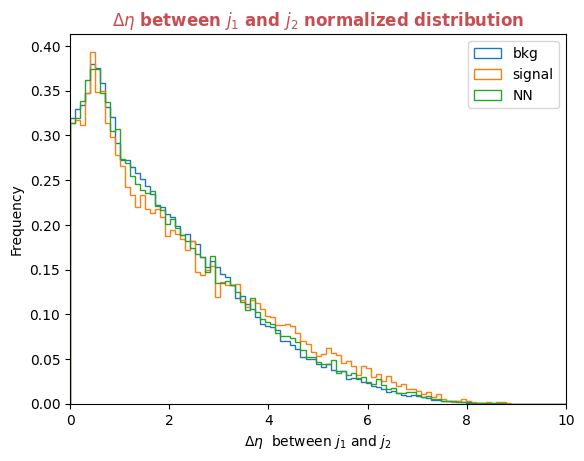

In [475]:
# Plot high level variables for signal, background and ANN selected events

plt.xlabel('$\Delta \eta $  between $j_1$ and $j_2$')
X = np.linspace(0.0,10.,100)
plt.rcParams['figure.figsize'] = (10,5)
# Plot bkg events
df_all['f_deltajj'][(df_all['isSignal'] == 0)].plot.hist( bins=X, label='bkg',histtype='step', density=1 )
# Plot signal events
df_all['f_deltajj'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step', density=1)
# Plot selected events by the ANN
df_sel['f_deltajj'].plot.hist(bins=X, label='NN',histtype='step', density=1)
plt.legend(loc='best')
plt.title('$\Delta \eta $ between $j_1$ and $j_2$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.xlim(0,10)
plt.show()

#### <font color="#4196B4">**TASK:**</font> Plot other high-level features like the dijets mass for signal, background and the NN classification for those events.

In [410]:
# *********************************************************************************
# * EDIT: Plot dijets mass for signal, background and NN selected events          *
# *********************************************************************************



(50.0, 400.0)

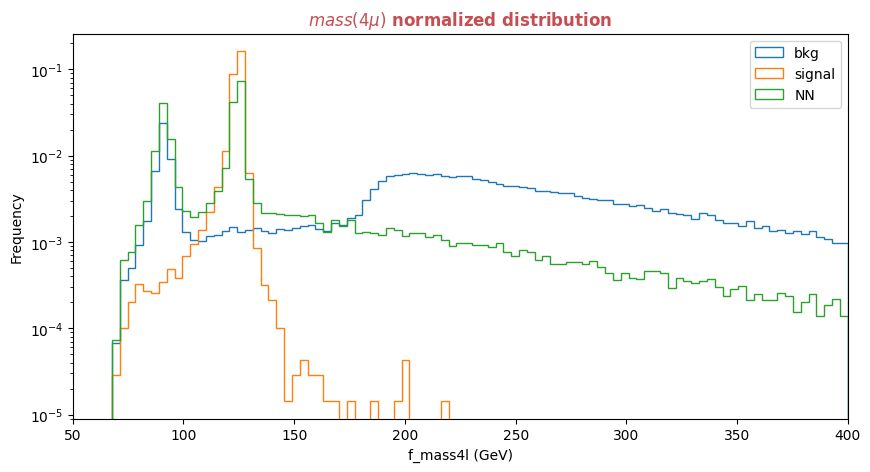

In [476]:

# Plot  dijets mass for signal, background and ANN selected events
plt.xlabel('f_mass4l (GeV)')
X = np.linspace(50, 400, 100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['f_mass4l'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step',log=True, density=1)
df_all['f_mass4l'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step',log=True, density=1)
df_sel['f_mass4l'].plot.hist(bins=X, label='NN',histtype='step', log=True, density=1)
plt.title('$mass(4\mu)$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.legend(loc='upper right')
plt.xlim(50,400)


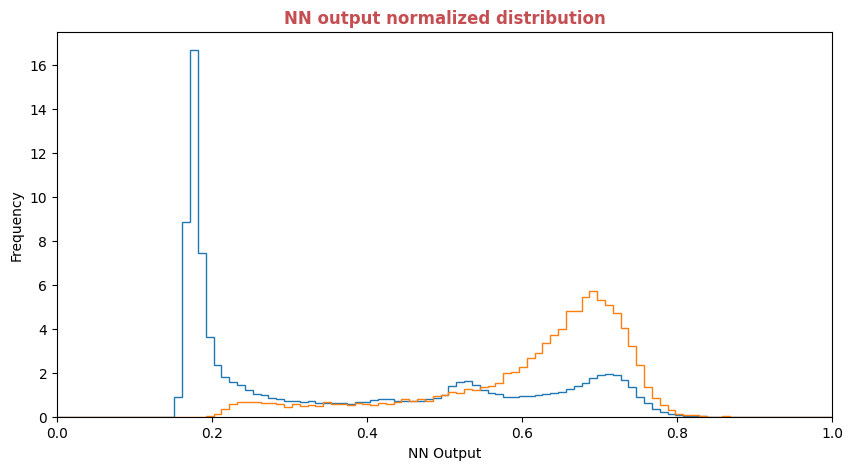

In [477]:
plt.xlabel('NN Output')
X = np.linspace(0.0,1.,100)
plt.rcParams['figure.figsize'] = (10,5)
# Plot bkg events
df_all['NNoutput'][(df_all['isSignal'] == 0)].plot.hist( bins=X, label='bkg',histtype='step', density=1 )
# Plot signal events
df_all['NNoutput'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step', density=1)
# Plot selected events by the ANN
#df_sel['f_deltajj'].plot.hist(bins=X, label='NN',histtype='step', density=1)
#plt.legend(loc='best')
plt.title('NN output normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.xlim(0,1.)
plt.show()

(20.0, 150.0)

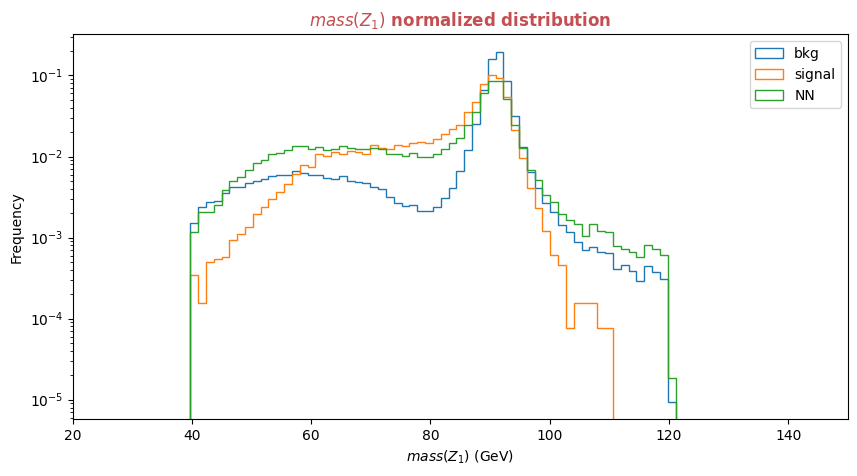

In [448]:

plt.xlabel('$mass(Z_{1})$ (GeV)')
X = np.linspace(20, 150, 100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['f_Z1mass'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step',log=True ,density=1)
df_all['f_Z1mass'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step',log=True, density=1)
df_sel['f_Z1mass'].plot.hist(bins=X, label='NN',histtype='step', log=True,density=1)
plt.title('$mass(Z_{1})$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.legend(loc='upper right')
plt.xlim(20,150)


(0.0, 150.0)

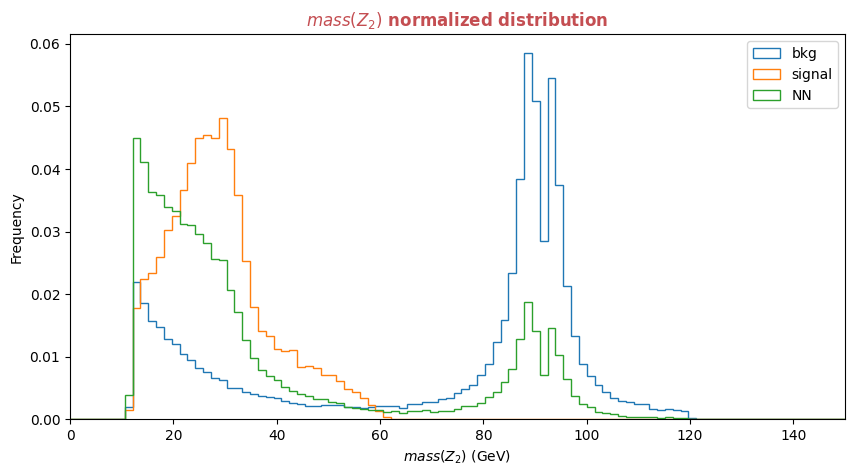

In [367]:
plt.xlabel('$mass(Z_{2})$ (GeV)')
X = np.linspace(0., 150, 100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['f_Z2mass'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step', density=1)
df_all['f_Z2mass'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step', density=1)
df_sel['f_Z2mass'].plot.hist(bins=X, label='NN',histtype='step', density=1)
plt.title('$mass(Z_{2})$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.legend(loc='upper right')
plt.xlim(0.,150)

#### <font color="#4196B4">**TASK:**</font> let's do the same for some variables which we have not used during the **training phase**. What can you say about them?

(-5.0, 5.0)

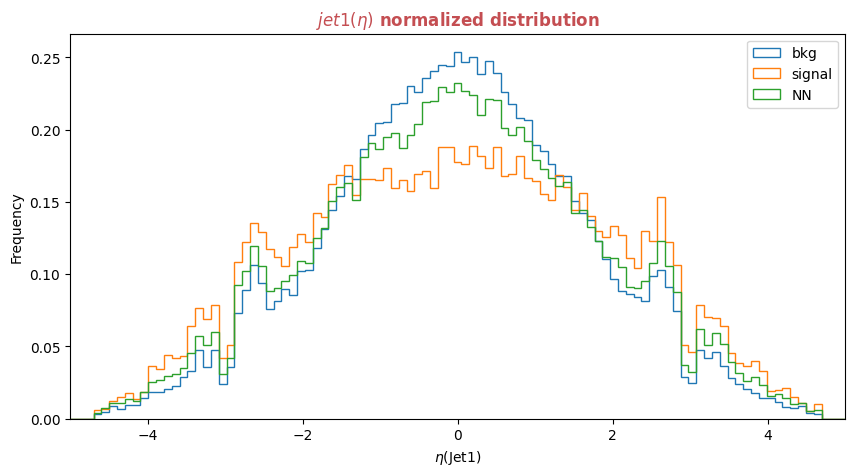

In [368]:
# Plot Jet1 eta for signal, background and NN selected events
plt.xlabel('$\eta$(Jet1)')
X = np.linspace(-5.,5.,100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['f_jet1_eta'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step', density=1)
df_all['f_jet1_eta'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step', density=1)
df_sel['f_jet1_eta'].plot.hist(bins=X, label='NN',histtype='step', density=1)
plt.legend(loc='upper right')
plt.title('$jet1(\eta)$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.xlim(-5,5)

(-5.0, 5.0)

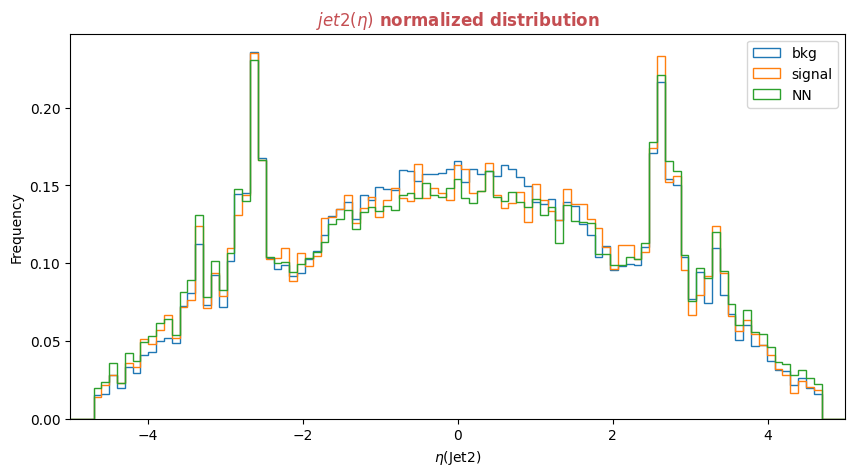

In [369]:
# Plot Jet2 eta for signal, background and NN selected events
plt.xlabel('$\eta$(Jet2)')
X = np.linspace(-5.,5.,100)
plt.rcParams['figure.figsize'] = (10,5)
df_all['f_jet2_eta'][(df_all['isSignal'] == 0)].plot.hist(bins=X, label='bkg',histtype='step', density=1)
df_all['f_jet2_eta'][(df_all['isSignal'] == 1)].plot.hist(bins=X, label='signal',histtype='step', density=1)
df_sel['f_jet2_eta'].plot.hist(bins=X, label='NN',histtype='step', density=1)
plt.title('$jet2(\eta)$ normalized distribution',fontsize=12,fontweight='bold', color='r')
plt.legend(loc='upper right')
plt.xlim(-5,5)



# <font color="#002A48">Optional Exercise 1 - Change the decay channel</font>

**Question to students:** What happens if you switch to the $4e$ decay channel? You can submit your model (see the ML challenge below) for this physical process as well!

# <font color="#002A48">Optional Exercise 2 - Merge the backgrounds</font>

**Question to students:** Merge the backgrounds used up to now for the training of our ML algorithms together with the ROOT File named **ttH_HToZZ_4L.root**. In this case you will use also the QCD $gg\to t\bar tH \to t\bar t ZZ \to 4\mu (e) + X$ *irreducible* background. Uncomment the correct lines of code to proceed!




# <font color="#002A48">You are really here, very very good...Try your hand at the Machine Learning challenge!</font>

Once you manage to improve the network performances, you can submit your results and participate in our ML challenge. The challenge samples are available in this workspace, but the true labels (`isSignal`) are removed so that you can't compute the AUC.

* You can participate as a single participant or as a team
* The winner is the one scoring the best AUC in the challenge samples!
* In the next box, you will find some lines of code for preparing an output csv file, containing your y_predic for this new data-set!
* Choose a meaningful name for your result csv file (i.e. your name, or your team name, the model used for the training phase, and the decay channel - 4$\mu$ or 4$e$ - but avoid to submit `results.csv`)
* Download the csv file and upload it here: https://recascloud.ba.infn.it/index.php/s/CnoZuNrlr3x7uPI
* You can submit multiple results, paying attention to name them accordingly (add the version number, such as `v1`, `v34`, etc.)
* You can use this exercise as a starting point (train over constituents)
* We will consider your best result for the final score.
* The winner will be asked to present the ML architecture!

**<font color="#002A48">Have fun!</font>**


In [ ]:
### Evaluate performance on an independent sample
# DO NOT CHANGE BELOW!



files_challenge = {
    "input_hl.csv":"dBHt9vsvKDUkJNt" #high level features
    }

import os
for file in files_challenge.items():
  if not os.path.exists(file[0]):
    b = os.system ( "wget -O %s --no-check-certificate 'https://recascloud.ba.infn.it/index.php/s/%s/download'" % file )
    if b: raise IOError ( "Error in downloading the file %s : (%s)" % file )

# If you have trouble running the previous commands in this cell, you can import the same files from INFN Pandora

#files_challenge = {
#    "input_hl.csv":"93dcd6/dl/input_HL-2.csv" #high level features
#    }
#import os
#for file in files_challenge.items():
#  if not os.path.exists(file[0]):
#    b = os.system ( "wget -O %s --no-check-certificate 'https://pandora.infn.it/public/%s'" % file )
#    if b: raise IOError ( "Error in downloading the file %s : (%s)" % file )

filename = {}

df_challenge = {}
#Open the file with dat aset without y_true (only features used for the training of the previous NN model)
filename['input'] = 'input_hl.csv'
df_challenge['input']  = pd.read_csv(filename['input'])
print(df_challenge['input'].shape)
df_challenge['input'].columns= NN_VARS
X_challenge  = np.asarray( df_challenge['input'].values ).astype(np.float32)
ret = model.predict(X_challenge[:,0:NDIM])
print(ret.shape)
print(ret)
#Convert the y_pred in a dataframe
df_answer= pd.DataFrame(ret)
df_answer.head()


(164560, 5)
5143/5143 [==============================] - 8s 1ms/step
(164560, 1)
[[0.5042528 ]
 [0.4999249 ]
 [0.50393665]
 ...
 [0.502077  ]
 [0.5020187 ]
 [0.5018018 ]]


,0
0,0.504253
1,0.499925
2,0.503937
3,0.503049
4,0.497803


In [ ]:
#Check of the input data-set without y_true
df_challenge['input'].head()

Now, let us convert the data-frame into a csv file!

In [ ]:
# As a first step,insert your group name (be creative)!
group_name = input('Enter your group name:')

Now you are ready to create your predicted labels to send us!

In [ ]:
output_filename = group_name + '_answer.csv'
df_answer.to_csv(output_filename)
print('Your y_pred has been created! Download it from your Drive directory!\n')
!ls -l

 Upload your results here:

 https://recascloud.ba.infn.it/index.php/s/CnoZuNrlr3x7uPI
